# Strategies

# 0 Set Up Carga de Librerias y Dataframes

In [1]:
# Generic Libraries
import warnings
warnings.filterwarnings('ignore')
import os
import re
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import  RobustScaler
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML  

from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score
from sklearn.metrics import  f1_score, fbeta_score, confusion_matrix
from sklearn.model_selection import GridSearchCV

from IPython.display import display, HTML

In [2]:
from xgboost import XGBClassifier
import xgboost as xgb
import shap

In [3]:
# Dataframe Original Preprocesado
df = pd.read_csv(r'HR-Employee-Attrition_preprocesed.csv', index_col=0)
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,annual_salary,economic_impact
0,41,Yes,Travel_Rarely,1102,Sales,1,Associate Degree,Life Sciences,1,Medium,...,0,8,0,Low,6,4,0,5,71916,14670.864
1,49,No,Travel_Frequently,279,Research & Development,8,High School,Life Sciences,2,High,...,1,10,3,High,10,7,1,7,61560,12558.240
2,37,Yes,Travel_Rarely,1373,Research & Development,2,Associate Degree,Other,4,Very High,...,0,7,3,High,0,0,0,0,25080,4037.880
3,33,No,Travel_Frequently,1392,Research & Development,3,Master’s Degree,Life Sciences,5,Very High,...,0,8,3,High,8,7,3,0,34908,6876.876
4,27,No,Travel_Rarely,591,Research & Development,2,High School,Medical,7,Low,...,1,6,3,High,2,2,2,2,41616,8198.352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,Associate Degree,Medical,2061,High,...,1,17,3,High,5,2,0,3,30852,6077.844
1466,39,No,Travel_Rarely,613,Research & Development,6,High School,Medical,2062,Very High,...,1,9,5,High,7,7,1,7,119892,25177.320
1467,27,No,Travel_Rarely,155,Research & Development,4,Bachelor’s Degree,Life Sciences,2064,Medium,...,1,6,0,High,6,2,0,3,73704,15035.616
1468,49,No,Travel_Frequently,1023,Sales,2,Bachelor’s Degree,Medical,2065,Very High,...,0,17,3,Medium,9,6,0,8,64680,13194.720


In [4]:
# Dataframe OneHotEncoder
df_ml = pd.read_csv(r'C:\Users\TrendingPC\Desktop\PROYECTOS\HHRR-IBM_ATTRITION\HR-Employee-ML.csv', index_col=0)
df_ml

,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,Education_Associate Degree,Education_Bachelor’s Degree,Education_Doctorate,Education_High School,...,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,annual_salary,economic_impact
0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,11,0,8,0,6,4,0,5,71916,14670.864
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,23,1,10,3,10,7,1,7,61560,12558.240
2,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,15,0,7,3,0,0,0,0,25080,4037.880
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,11,0,8,3,8,7,3,0,34908,6876.876
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,12,1,6,3,2,2,2,2,41616,8198.352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,17,1,17,3,5,2,0,3,30852,6077.844
1466,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,15,1,9,5,7,7,1,7,119892,25177.320
1467,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,20,1,6,0,6,2,0,3,73704,15035.616
1468,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,14,0,17,3,9,6,0,8,64680,13194.720


In [5]:
X = df_ml.drop(columns='Attrition')
y = df_ml['Attrition']

In [6]:
# Separation of the dataset

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42,stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1029, 78), (441, 78), (1029,), (441,))

In [7]:
# Check dataset composition

print(" Fraudulent Count for Full data :  ",np.sum(y))
print(" Fraudulent Count for Train data : ",np.sum(y_train))
print(" Fraudulent Count for Test data :   ",np.sum(y_test))

 Fraudulent Count for Full data :   237
 Fraudulent Count for Train data :  166
 Fraudulent Count for Test data :    71


In [8]:
# Save the testing set for evaluation
X_test_saved = X_test.copy()
y_test_saved = y_test.copy()
print("Saved X_test & y_test")

Saved X_test & y_test


# 1 Transformaciones de datos

In [9]:
# Import of specific libraries
from collections import Counter
from imblearn.over_sampling import SMOTE

# Initial situation
print('Original dataset shape %s' % Counter(y_train))

# Calculate OverSampling model
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print('Resampled dataset shape %s' % Counter(y_train_smote))

Original dataset shape Counter({0: 863, 1: 166})
Resampled dataset shape Counter({0: 863, 1: 863})


In [10]:
# Import of specific libraries
from imblearn.over_sampling import ADASYN

# Initial situation
print('Original dataset shape %s' % Counter(y_train))

# Calculate OverSampling model
adasyn = ADASYN(random_state=42)
X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train, y_train)

print('Resampled dataset shape %s' % Counter(y_train_adasyn))

Original dataset shape Counter({0: 863, 1: 166})
Resampled dataset shape Counter({0: 863, 1: 800})


In [11]:
# - Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data

from sklearn import metrics 
from sklearn import preprocessing


from sklearn.preprocessing import PowerTransformer

pt= preprocessing.PowerTransformer(method='yeo-johnson', copy=True)  # creates an instance of the PowerTransformer class.
pt.fit(X_train)

X_train_pt = pt.transform(X_train)
X_test_pt = pt.transform(X_test)

y_train_pt = y_train
y_test_pt = y_test

In [12]:
# Import of specific libraries
from collections import Counter
from imblearn.over_sampling import SMOTE

# Initial situation
print('Original dataset shape %s' % Counter(y_train_pt))

# Calculate OverSampling model
smote = SMOTE(random_state=42)
X_train_smote_pt, y_train_smote_pt = smote.fit_resample(X_train_pt, y_train_pt)

print('Resampled dataset shape %s' % Counter(y_train_smote_pt))

Original dataset shape Counter({0: 863, 1: 166})
Resampled dataset shape Counter({0: 863, 1: 863})


In [13]:
# Import of specific libraries
from imblearn.over_sampling import ADASYN

# Initial situation
print('Original dataset shape %s' % Counter(y_train))

# Calculate OverSampling model
adasyn = ADASYN(random_state=42)
X_train_adasyn_pt, y_train_adasyn_pt = adasyn.fit_resample(X_train_pt, y_train_pt)

print('Resampled dataset shape %s' % Counter(y_train_adasyn_pt))

Original dataset shape Counter({0: 863, 1: 166})
Resampled dataset shape Counter({0: 863, 1: 839})


In [14]:
# LOAD OF MODELS.
# perfom cross validation on the X_train & y_train 
from sklearn.model_selection import StratifiedKFold

# Initialize StratifiedKFold cross-validator
# perform cross validation
skf = StratifiedKFold(n_splits=3, random_state=None, shuffle=False)
#  Shuffle is False because we need a constant best model when we use GridSearchCV

In [15]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict

In [16]:
# Original distribution
OR_origin = ['OR origin',X_train, y_train, X_test, y_test]
OR_smote =['OR smote',X_train_smote, y_train_smote, X_test, y_test]
OR_adasyn = ['OR adasyn', X_train_adasyn, y_train_adasyn, X_test, y_test]

# Power Transformation
PT_origin = ['PT origin',X_train_pt, y_train_pt, X_test_pt, y_test_pt]
PT_smote = ['PT smote',X_train_smote_pt, y_train_smote_pt, X_test_pt, y_test_pt ]
PT_adasyn = ['PT adasyn', X_train_adasyn_pt, y_train_adasyn_pt, X_test_pt, y_test_pt]

In [17]:
distributions =[OR_origin, OR_smote, OR_adasyn, PT_origin, PT_smote, PT_adasyn]

In [18]:
pd.set_option('display.max_colwidth', None)

# 2 Funciones y Mapeo Variables

## 2.1 Funciones

In [19]:
def jobrole_profile(dataframe, condiciones):
    """
    Filtra y cruza un DataFrame principal con un DataFrame de condiciones, 
    retornando un perfil basado en variables, valores y métricas específicas.

    Parámetros:
    ----------
    dataframe : pd.DataFrame
        DataFrame original con información que contiene columnas como 'variable' y 'value'.
    
    condiciones : pd.DataFrame
        DataFrame que contiene las condiciones para filtrar, con columnas 'Variable' y 'Valor', 
        además de métricas como 'scoring_attrition', '%_scoring' y 'Grupo'.

    Retorna:
    -------
    pd.DataFrame
        DataFrame resultante con las columnas: 
        ['variable', 'value', 'scoring_attrition', '%_scoring', 'Grupo'],
        ordenado por la columna 'variable'.
    """
    # Paso 1: Resetear el índice del DataFrame original
    dataframe_reset = dataframe.reset_index()

    # Paso 2: Realizar el merge (inner join) con el DataFrame de condiciones
    filtrado = dataframe_reset.merge(
        condiciones,
        left_on=['variable', 'value'],
        right_on=['Variable', 'Valor'],
        how='inner'
    )

    # Paso 3: Seleccionar las columnas relevantes para el perfil
    result_dataframe = filtrado[['variable', 'value', 'scoring_attrition', '%_scoring', 'Grupo']]

    # Ordenar el resultado por la columna 'variable'
    result_dataframe = result_dataframe.sort_values(by='variable')

    return result_dataframe


In [20]:
def get_total_profile(dataframe_no_risk, dataframe_in_risk, dataframe_attrition):
    """
    Combina tres DataFrames con perfiles de riesgo en un único DataFrame consolidado.

    Parámetros:
    ----------
    dataframe_no_risk : pd.DataFrame
        DataFrame que contiene información para empleados sin riesgo, con una columna '%_scoring'.
    
    dataframe_in_risk : pd.DataFrame
        DataFrame que contiene información para empleados en riesgo, con una columna '%_scoring'.

    dataframe_attrition : pd.DataFrame
        DataFrame que contiene información para empleados con attrition, con una columna '%_scoring'.

    Retorna:
    -------
    pd.DataFrame
        DataFrame combinado con las columnas:
        ['variable', 'value', '%_scoring_resultado', '%_scoring_no_risk', '%_scoring_attrition'],
        con valores faltantes rellenados con 0.
    """

    # Renombrar las columnas de porcentaje scoring para evitar conflictos y clarificar el origen
    dataframe_no_risk = dataframe_no_risk.rename(columns={'%_scoring': '%_scoring_no_risk'})
    dataframe_in_risk = dataframe_in_risk.rename(columns={'%_scoring': '%_scoring_resultado'})
    dataframe_attrition = dataframe_attrition.rename(columns={'%_scoring': '%_scoring_attrition'})

    # Merge sucesivo de los tres DataFrames sobre las columnas ['variable', 'value']
    df_merged = dataframe_in_risk[['variable', 'value', '%_scoring_resultado']].merge(
        dataframe_no_risk[['variable', 'value', '%_scoring_no_risk']],
        on=['variable', 'value'], how='outer'
    ).merge(
        dataframe_attrition[['variable', 'value', '%_scoring_attrition']],
        on=['variable', 'value'], how='outer'
    )

    # Rellenar valores faltantes con 0 (opcional según la lógica de negocio)
    df_merged = df_merged.fillna(0)

    return df_merged


In [21]:
def crear_minicubo(dataframe, dimensiones, metricas):
    """
    Crea un 'minicubo' que resume la distribución de una métrica (por ejemplo, 'scoring_attrition') 
    a lo largo de un conjunto de variables categóricas.

    Parámetros:
    ----------
    dataframe : pd.DataFrame
        DataFrame original que contiene las variables categóricas y métricas.

    dimensiones : pd.DataFrame
        DataFrame que contiene al menos una columna 'Variable' con los nombres de las dimensiones 
        categóricas a analizar.

    metricas : list
        Lista de nombres de las métricas a incluir (actualmente solo se usa 'scoring_attrition').

    Retorna:
    -------
    pd.DataFrame
        DataFrame con las columnas: ['variable', 'value', 'scoring_attrition', '%_scoring'],
        donde 'scoring_attrition' representa el conteo por combinación y '%_scoring' 
        es el porcentaje respecto al total del dataset original.
    """

    # Paso 1: Obtener la lista de variables desde el DataFrame de dimensiones
    variables = dimensiones['Variable'].tolist()

    # Paso 2: Definir las columnas a mantener (dimensiones + métricas)
    columnas = variables + metricas

    # Paso 3: Seleccionar las columnas necesarias del DataFrame original
    minicubo = dataframe[columnas]

    # Paso 4: Reestructurar el DataFrame para que cada combinación variable-valor sea una fila
    minicubo = minicubo.melt(id_vars=metricas, var_name='variable', value_name='value')

    # Paso 5: Agrupar por variable y valor, contando ocurrencias
    minicubo = minicubo.groupby(['variable', 'value'])[metricas].count().reset_index()

    # Paso 6: Calcular el porcentaje sobre el total del DataFrame original
    minicubo['%_scoring'] = round((minicubo['scoring_attrition'] / dataframe.shape[0]) * 100, 0)

    return minicubo


In [22]:
import matplotlib.pyplot as plt

def boxplot(df, title):
    """
    Genera un boxplot de la métrica 'scoring_attrition' agrupada por 'JobRole',
    con áreas de color que representan distintos niveles de riesgo.

    Parámetros:
    ----------
    df : pd.DataFrame
        DataFrame que debe contener al menos las columnas 'scoring_attrition' y 'JobRole'.
    
    title : str
        Título principal del gráfico.

    Retorna:
    -------
    None
        Muestra el gráfico directamente.
    """

    # Crear el boxplot
    boxplot = df.boxplot(column='scoring_attrition', by='JobRole', figsize=(20, 12))
    
    # Personalización de títulos y etiquetas
    plt.title(title)  # Título del gráfico
    plt.suptitle('')  # Quitar el título automático generado por pandas
    plt.xlabel('Job Role')
    plt.ylabel('Scoring Attrition')
    
    # Escala del eje Y (de 0 a 1, con pasos de 0.1)
    plt.yticks([i / 10 for i in range(0, 11)])
    
    # Colorear zonas de riesgo
    plt.axhspan(0, 0.4, color='green', alpha=0.2, label='Low Risk')
    plt.axhspan(0.4, 0.7, color='orange', alpha=0.2, label='Medium Risk')
    plt.axhspan(0.7, 1.0, color='red', alpha=0.2, label='High Risk')
    
    # Agregar leyenda
    plt.legend(loc='upper right', title='Risk Zones')
    
    # Mostrar gráfico
    plt.show()


In [23]:
from IPython.display import display, HTML

def get_total(dataframe, criterio, titulo):
    """
    Agrupa un DataFrame de empleados en riesgo según un criterio específico y muestra automáticamente:
        - Un título en HTML (tamaño de fuente 20)
        - El DataFrame con métricas agrupadas

    Parámetros:
    -----------
    dataframe : pd.DataFrame
        DataFrame con los datos de empleados en riesgo.

    criterio : str o list de str
        Columna(s) por las que se agruparán los datos (por ejemplo: 'JobRole', 'Department').

    No retorna nada. Muestra directamente el título y el DataFrame.
    """
    # Agrupar y calcular métricas
    tabla = dataframe.groupby(criterio).agg(
        num_empleados=('JobRole', 'count'),
        impacto_economico_total=('economic_impact', 'sum'),
        impacto_economico_medio=('economic_impact', 'mean'),
        scoring_medio=('scoring_attrition', 'mean')
    ).sort_values('impacto_economico_total', ascending=False).reset_index()

    # Redondear valores
    tabla['impacto_economico_total'] = tabla['impacto_economico_total'].round(2)
    tabla['impacto_economico_medio'] = tabla['impacto_economico_medio'].round(2)

    # Mostrar título y tabla directamente
    titulo = f'<h5 style="font-size:25px">{titulo}</h2>'
    pie = f'IMPORTE TOTAL PERDIDAS POR ABANDONO DE EMPLEADOS:  {round(tabla.impacto_economico_total.sum(),1)}'
    display(HTML(titulo))
    display(tabla)
    display(HTML(pie))

In [24]:
def perfil_ajustado(dataframe, referencia):
    """
    Ajusta y filtra un DataFrame para generar un perfil de variables cruzando con un
    DataFrame de referencia, devolviendo un resumen con métricas específicas por variable y valor.

    Parámetros:
    -----------
    dataframe : pd.DataFrame
        El DataFrame de entrada que contiene las columnas 'variable' y 'value'.

    referencia : pd.DataFrame
        DataFrame auxiliar con las columnas ['Variable', 'Valor', 'Grupo'] para realizar el cruce.

    Retorna:
    --------
    pd.DataFrame
        Un DataFrame con las columnas:
        ['Grupo', 'variable', 'value', 'scoring_attrition', '%_scoring']
        ordenado por la columna 'variable'.
    """
    import pandas as pd

    # Validaciones
    columnas_entrada = {'variable', 'value'}
    columnas_referencia = {'Variable', 'Valor', 'Grupo'}
    
    if not columnas_entrada.issubset(dataframe.columns):
        raise ValueError(f"El DataFrame de entrada debe contener las columnas: {columnas_entrada}")
    if not columnas_referencia.issubset(referencia.columns):
        raise ValueError(f"El DataFrame de referencia debe contener las columnas: {columnas_referencia}")

    # Limpieza y preparación
    dataframe = dataframe.drop(columns=[col for col in dataframe.columns if col == 'level_0'], errors='ignore')
    dataframe = dataframe.reset_index(drop=True)

    # Merge con las dimensiones (retención o separación)
    filtrado = dataframe.merge(
        referencia,
        left_on=['variable', 'value'],
        right_on=['Variable', 'Valor'],
        how='inner'
    )

    # Salida
    resultado = filtrado[['Grupo', 'variable', 'value', 'scoring_attrition', '%_scoring']]
    resultado = resultado.sort_values(by='variable', ignore_index=True)
    return resultado

In [25]:
def combinar_perfiles(df_in_risk, df_no_risk, df_attrition, referencia):
    """
    Combina los perfiles ajustados de tres DataFrames diferentes 
    (riesgo, sin riesgo y attrition) en un solo DataFrame para comparación.
    """
    resultado_in_risk = perfil_ajustado(df_in_risk, referencia).rename(columns={'%_scoring': '%_scoring_in_risk'})
    resultado_no_risk = perfil_ajustado(df_no_risk, referencia).rename(columns={'%_scoring': '%_scoring_no_risk'})
    resultado_attrition = perfil_ajustado(df_attrition, referencia).rename(columns={'%_scoring': '%_scoring_attrition'})

    # Unión por variable y value
    combinado = resultado_in_risk.merge(resultado_no_risk, on=['Grupo', 'variable', 'value'], how='outer')
    combinado = combinado.merge(resultado_attrition, on=['Grupo', 'variable', 'value'], how='outer')

    # Rellenar NaNs con 0
    combinado = combinado.fillna(0)

    return combinado

In [26]:
def generar_comparativo_por_rol(job_role, data_in_risk, data_no_risk, data_attrition, dimensiones, metricas, titulo):
    """
    Genera un comparativo de perfiles ajustados para un rol específico,
    considerando tres grupos: en riesgo, sin riesgo y con attrition.

    Parámetros:
    -----------
    job_role : str
        El nombre del rol (JobRole) para el cual se desea generar el análisis.
    
    data_in_risk : pd.DataFrame
        DataFrame que contiene los registros clasificados como "en riesgo".
    
    data_no_risk : pd.DataFrame
        DataFrame que contiene los registros clasificados como "sin riesgo".
    
    data_attrition : pd.DataFrame
        DataFrame que contiene los registros clasificados como "attrition".
    
    dimensiones : list
        Lista de columnas que se utilizarán como dimensiones en el minicubo.
    
    metricas : list
        Lista de columnas que se utilizarán como métricas en el minicubo.
    
    titulo : str
        Título que se mostrará en la salida del análisis.

    Retorna:
    --------
    pd.DataFrame
        Un DataFrame con el comparativo de los perfiles ajustados para el rol especificado.
    """

    # Filtrado y procesamiento para In Risk
    dataframe_risk = data_in_risk[data_in_risk['JobRole'] == job_role]
    dataframe_risk = crear_minicubo(dataframe_risk, dimensiones, metricas)

    # Filtrado y procesamiento para No Risk
    dataframe_non_risk = data_no_risk[data_no_risk['JobRole'] == job_role]
    dataframe_non_risk = crear_minicubo(dataframe_non_risk, dimensiones, metricas)

    # Filtrado y procesamiento para Attrition
    dataframe_attrition = data_attrition[data_attrition['JobRole'] == job_role]
    dataframe_attrition = crear_minicubo(dataframe_attrition, dimensiones, metricas)

    # Combinación de perfiles
    comparativo = combinar_perfiles(dataframe_risk, dataframe_non_risk, dataframe_attrition)

    # Mostrar título formateado como HTML
    titulo = f'<h5 style="font-size:25px">{titulo}</h5>'
    display(HTML(titulo))

    return comparativo

In [27]:
def panel_resultado(dataframe):
    """
    Visualiza un panel comparativo normalizado de las métricas '%_scoring_in_risk', 
    '%_scoring_no_risk' y '%_scoring_attrition' para cada combinación de variable y valor.

    Cada fila del DataFrame se convierte en una línea con tres puntos:
    - Azul: In Risk
    - Verde: No Risk
    - Rojo: Attrition

    Los valores son normalizados individualmente entre 0 y 100 por fila para facilitar la comparación visual.

    Parámetros:
    -----------
    dataframe : pd.DataFrame
        DataFrame con columnas: ['variable', 'value', '%_scoring_in_risk', '%_scoring_no_risk', '%_scoring_attrition']
    """
    import matplotlib.pyplot as plt

    # Estilos y parámetros
    plt.style.use('seaborn-v0_8-whitegrid')
    point_size = 100
    font_size = 10

    # Número de filas del panel
    N = len(dataframe)
    fig, axes = plt.subplots(nrows=N, figsize=(12, N * 0.6), sharex=False)

    # Asegurar que axes sea iterable
    if N == 1:
        axes = [axes]

    for i, row in dataframe.iterrows():
        ax = axes[i]
        y_label = f"{row['variable']} - {row['value']}"

        # Valores originales
        v1 = row['%_scoring_in_risk']
        v2 = row['%_scoring_no_risk']
        v3 = row['%_scoring_attrition']

        # Normalización individual por fila (min-max entre los tres valores)
        valores = [v1, v2, v3]
        vmin = min(valores)
        vmax = max(valores)

        if vmax - vmin == 0:
            norm_v1 = norm_v2 = norm_v3 = 50  # Evita división por cero
        else:
            norm_v1 = (v1 - vmin) / (vmax - vmin) * 100
            norm_v2 = (v2 - vmin) / (vmax - vmin) * 100
            norm_v3 = (v3 - vmin) / (vmax - vmin) * 100

        # Línea base
        ax.hlines(y=0, xmin=0, xmax=100, color='lightgray', linewidth=1)

        # Puntos de scoring normalizado
        ax.scatter(norm_v1, 0, s=point_size, color='blue', edgecolor='black', label='In Risk')
        ax.scatter(norm_v2, 0, s=point_size, color='green', edgecolor='black', label='No Risk')
        ax.scatter(norm_v3, 0, s=point_size, color='red', edgecolor='black', label='Attrition')

        # Etiquetas con los valores originales
        ax.text(norm_v1, 0.05, f"{v1:.1f}%", color='blue', ha='center', fontsize=font_size)
        ax.text(norm_v2, 0.05, f"{v2:.1f}%", color='green', ha='center', fontsize=font_size)
        ax.text(norm_v3, 0.05, f"{v3:.1f}%", color='red', ha='center', fontsize=font_size)

        # Configuración de los ejes
        ax.set_xlim(0, 100)
        ax.set_yticks([])
        ax.set_xticks([0, 50, 100])
        ax.set_ylabel(y_label, rotation=0, labelpad=150, va='center', fontsize=font_size)
        ax.tick_params(axis='x', labelsize=font_size)
        ax.grid(True, axis='x', linestyle='--', alpha=0.3)

    # Leyenda general (una vez)
    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper right', fontsize=font_size)

    # Título del panel
    plt.suptitle('Comparativo normalizado de % Scoring (min=0, max=100)', fontsize=14, weight='bold')
    plt.tight_layout(rect=[0, 0, 0.95, 0.97])
    plt.show()

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

def heatmap_Jobrole(df, titulo):
    # Crear una nueva columna combinando 'variable' y 'value' para usarla como etiqueta única
    df["label"] = df["variable"] + " = " + df["value"]
    
    # Obtener los grupos únicos de la columna 'Grupo'
    grupos = df["Grupo"].unique()
    n = len(grupos)  # Número de grupos únicos
    
    # Crear una figura con subplots (uno por cada grupo)
    fig, axes = plt.subplots(nrows=n, figsize=(10, n * 2.5), constrained_layout=True)
    
    # Si solo hay un grupo, convertir axes en una lista para iterar de forma uniforme
    if n == 1:
        axes = [axes]
    
    # Iterar sobre cada grupo y su correspondiente eje
    for ax, grupo in zip(axes, grupos):
        # Filtrar las filas correspondientes al grupo actual
        subset = df[df["Grupo"] == grupo]

        # Crear una tabla pivote con los porcentajes de riesgo como columnas y 'label' como índice
        heatmap_data = subset.pivot_table(
            index="label",
            values=["%_scoring_no_risk", "%_scoring_in_risk", "%_scoring_attrition"]
        )

        # Asegurar el orden correcto de las columnas en el heatmap
        heatmap_data = heatmap_data[["%_scoring_no_risk", "%_scoring_in_risk", "%_scoring_attrition"]]
    
        # Dibujar el heatmap en el subplot correspondiente
        sns.heatmap(
            heatmap_data,
            ax=ax,                     # Eje actual
            annot=True,                # Mostrar los valores numéricos en las celdas
            fmt=".1f",                 # Formato de los números (un decimal)
            cmap='Blues',              # Paleta de colores
            linewidths=0.5,            # Líneas divisorias entre celdas
            cbar=(ax == axes[0]),      # Mostrar la barra de color solo en el primer subplot
            cbar_kws={'label': '% empleados'} if ax == axes[0] else None
        )
    
        # Configurar las etiquetas del eje X en la parte superior
        ax.xaxis.set_ticks_position("top")
        ax.xaxis.set_label_position("top")
        ax.tick_params(top=True, labeltop=True, bottom=False, labelbottom=False)
    
        # Agregar un título al subplot con el nombre del grupo
        ax.set_title(f"Grupo: {grupo}", loc="left", fontsize=14, weight="bold")
        
        # Eliminar etiquetas de los ejes para mejor visualización
        ax.set_xlabel("")
        ax.set_ylabel("")
    
    # Título general para toda la figura
    plt.suptitle(f"{titulo}", fontsize=20, fontweight="bold", y=1.02)
    
    # Mostrar el gráfico completo
    plt.show()


In [29]:
def mode_by_jobrole(dataframe, column_groups_final):
    """
    Filtra un DataFrame por el valor de 'JobRole' y calcula la moda (valor más común)
    de las columnas especificadas en 'column_groups_final'. Devuelve los resultados como un DataFrame.

    Parámetros:
    -----------
    dataframe : pd.DataFrame
        El conjunto de datos original.

    column_groups_final : dict
        Diccionario donde las claves son nombres de grupos (str) y los valores son listas de nombres de columnas.

    jobrole : str, opcional
        El valor de 'JobRole' para filtrar el DataFrame (por defecto: 'Sales Executive').

    Retorna:
    --------
    pd.DataFrame
        Un DataFrame con las columnas:
        - 'Grupo': nombre del grupo de variables
        - 'Variable': nombre de la columna
        - 'Moda': valor más frecuente para esa variable en el subconjunto filtrado
    """
    
    # Filtrar por el JobRole especificado
   
    if dataframe.empty:
        raise ValueError(f"No se encontraron registros con JobRole = '{jobrole}'.")

    try:
        common_values = dataframe.mode().iloc[0]
    except IndexError:
        raise ValueError("No se pudo calcular la moda del subconjunto filtrado.")

    results = []

    for group, columns in column_groups_final.items():
        for col in columns:
            if col in common_values:
                results.append({
                    "Grupo": group,
                    "Variable": col,
                    "Moda": common_values[col]
                })

    result_df = pd.DataFrame(results)
    return result_df

## 2.2 Mapeo de Variables

In [30]:
# Mapeo de Variables
column_groups_final = {
    "Demographic": [
        'Age', 'Gender', 'MaritalStatus', 'Education', 'EducationField'],
    "JobInformation": [
        'Department','JobLevel', 'JobRole', 'DistanceFromHome', 'NumCompaniesWorked',
        'TotalWorkingYears', 'JobInvolvement', 'YearsAtCompany', 'YearsInCurrentRole', 
        'YearsWithCurrManager','TrainingTimesLastYear',
    ],
    "Compensation": [
        'MonthlyRate', 'DailyRate', 'HourlyRate', 'MonthlyIncome', 'PercentSalaryHike', 'StockOptionLevel'
    ],
    "Performance": [
        'EnvironmentSatisfaction', 'JobSatisfaction', 'RelationshipSatisfaction', 'PerformanceRating'
    ],
    "Engagement": [
        'OverTime', 'BusinessTravel', 'WorkLifeBalance', 'JobInvolvement']
}

total_variables = ["Demographic", "JobInformation", "Compensation", "Performance", "Engagement"]

In [31]:
jobrole_levels = {
    "Executive": [  # Nivel directivo
        "Research Director",
        "Manufacturing Director",
        "Healthcare Representative"  # (si cumple una función gerencial en tu estructura)
    ],
    "Managerial": [  # Nivel gerencial
        "Manager"
    ],
    "Professional": [  # Nivel técnico/científico profesional
        "Research Scientist",
        "Sales Executive",
        "Human Resources"
    ],
    "Operational": [  # Nivel operativo o soporte
        "Laboratory Technician",
        "Sales Representative"
    ]
}


In [32]:
def map_jobrole_level(role):
    if role in jobrole_levels['Executive']:
        return 'Executive'
    elif role in jobrole_levels['Managerial']:
        return 'Managerial'
    elif role in jobrole_levels['Professional']:
        return 'Professional'
    elif role in jobrole_levels['Operational']:
        return 'Operational'
    else:
        return 'Other'

In [33]:
df['JobRoleLevel'] = df['JobRole'].apply(map_jobrole_level)

In [34]:
df['JobRoleLevel'].value_counts()

JobRoleLevel
Professional    670
Executive       356
Operational     342
Managerial      102
Name: count, dtype: int64

In [35]:
df.groupby('Department')['JobRole'].value_counts()

Department              JobRole                  
Human Resources         Human Resources               52
                        Manager                       11
Research & Development  Research Scientist           292
                        Laboratory Technician        259
                        Manufacturing Director       145
                        Healthcare Representative    131
                        Research Director             80
                        Manager                       54
Sales                   Sales Executive              326
                        Sales Representative          83
                        Manager                       37
Name: count, dtype: int64

# 3 Carga Modelo XgBoost

In [36]:
ac = XGBClassifier(learning_rate=0.05, booster='gblinear', n_estimators=50 )
ac.fit(X_train, y_train)

XGBClassifier(base_score=None, booster='gblinear', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [37]:
# Predicción
pred = ac.predict_proba(X_test)[:, 1]
pred[:20]

array([0.14661919, 0.00931267, 0.12092206, 0.05622377, 0.10046263,
       0.00581344, 0.04862267, 0.02168439, 0.271764  , 0.00291617,
       0.02075773, 0.03797577, 0.2416342 , 0.07871765, 0.02503918,
       0.01375154, 0.00486393, 0.5866962 , 0.03209382, 0.4614548 ],
      dtype=float32)

In [38]:
# Evaluación
from sklearn.metrics import roc_auc_score

round(roc_auc_score(y_test,pred),3)

0.832

In [39]:
# Incorporamos la prediccion al dataset.
df['scoring_attrition'] = ac.predict_proba(df_ml.drop(columns = 'Attrition'))[:, 1]
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,annual_salary,economic_impact,JobRoleLevel,scoring_attrition
0,41,Yes,Travel_Rarely,1102,Sales,1,Associate Degree,Life Sciences,1,Medium,...,0,Low,6,4,0,5,71916,14670.864,Professional,0.514326
1,49,No,Travel_Frequently,279,Research & Development,8,High School,Life Sciences,2,High,...,3,High,10,7,1,7,61560,12558.240,Professional,0.015238
2,37,Yes,Travel_Rarely,1373,Research & Development,2,Associate Degree,Other,4,Very High,...,3,High,0,0,0,0,25080,4037.880,Operational,0.451562
3,33,No,Travel_Frequently,1392,Research & Development,3,Master’s Degree,Life Sciences,5,Very High,...,3,High,8,7,3,0,34908,6876.876,Professional,0.140098
4,27,No,Travel_Rarely,591,Research & Development,2,High School,Medical,7,Low,...,3,High,2,2,2,2,41616,8198.352,Operational,0.294876
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,Associate Degree,Medical,2061,High,...,3,High,5,2,0,3,30852,6077.844,Operational,0.042036
1466,39,No,Travel_Rarely,613,Research & Development,6,High School,Medical,2062,Very High,...,5,High,7,7,1,7,119892,25177.320,Executive,0.042839
1467,27,No,Travel_Rarely,155,Research & Development,4,Bachelor’s Degree,Life Sciences,2064,Medium,...,0,High,6,2,0,3,73704,15035.616,Executive,0.043367
1468,49,No,Travel_Frequently,1023,Sales,2,Bachelor’s Degree,Medical,2065,Very High,...,3,Medium,9,6,0,8,64680,13194.720,Professional,0.071035


In [40]:
df_scoring = df.copy()

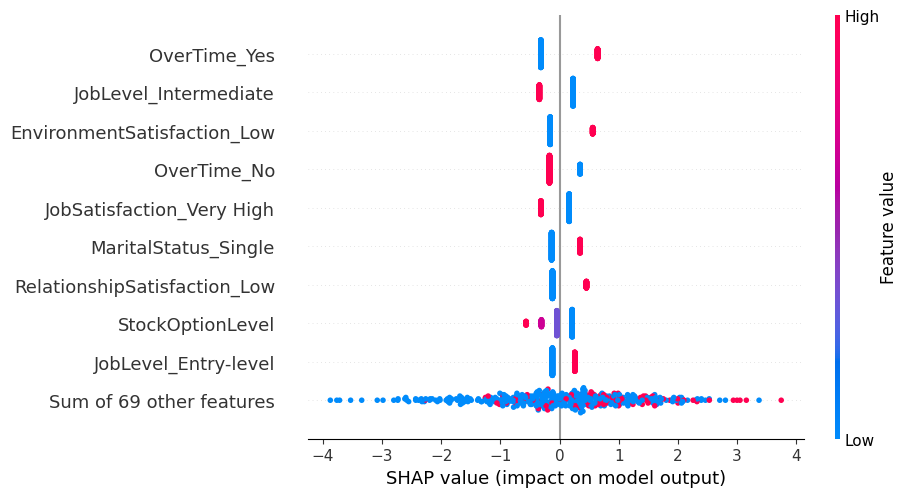

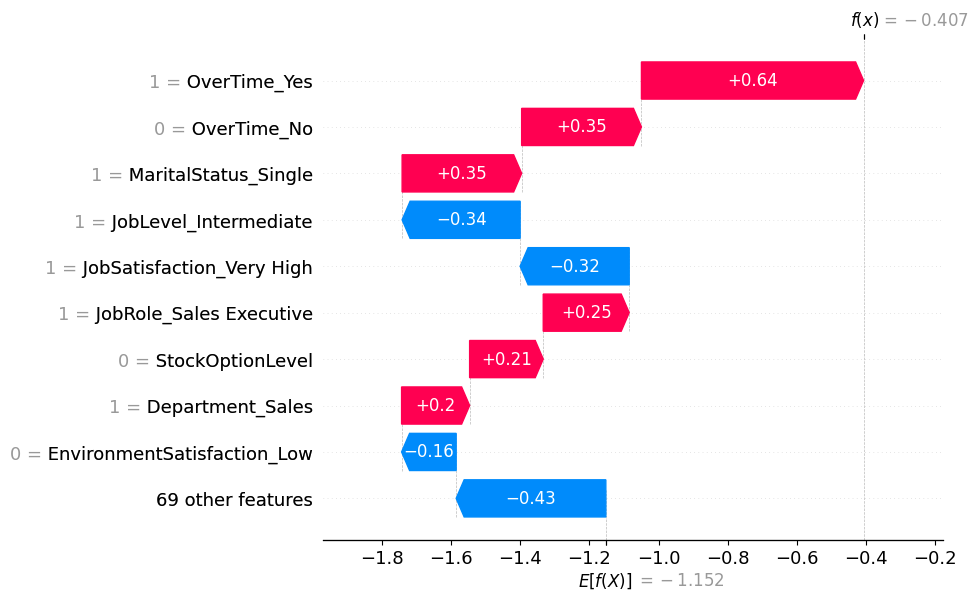

In [41]:
explainer = shap.Explainer(ac, X_train)
shap_values = explainer(X_test)

# Gráfico global: contribución de variables
shap.plots.beeswarm(shap_values)

# Gráfico de un empleado específico
shap.plots.waterfall(shap_values[0])  # cambia el índice según el empleado

##### <U>CONCLUSIONES:</U>

Las principales variables de abandono son:

- Horas Extras - OverTime== Yes
- Estado Civil - MaritalStatus== Single
- Puesto de Trabajo - JobRole== Sales Executive
    


# 4 Organizacion Data 

## 4.1 Resultados del modelo

### 4.1.1 Agrupacion de variables

In [42]:
# Clasificacion de las variables

column_groups_final = {
    "Demographic": [
        'Age', 'Gender', 'MaritalStatus', 'Education', 'EducationField'],
    "JobInformation": [
        'Department','JobLevel', 'JobRole', 'DistanceFromHome', 'NumCompaniesWorked',
        'TotalWorkingYears', 'JobInvolvement', 'YearsAtCompany', 'YearsInCurrentRole', 
        'YearsWithCurrManager','TrainingTimesLastYear',
    ],
    "Compensation": [
        'MonthlyRate', 'DailyRate', 'HourlyRate', 'MonthlyIncome', 'PercentSalaryHike', 'StockOptionLevel'
    ],
    "Performance": [
        'EnvironmentSatisfaction', 'JobSatisfaction', 'RelationshipSatisfaction', 'PerformanceRating'
    ],
    "Engagement": [
        'OverTime', 'BusinessTravel', 'WorkLifeBalance', 'JobInvolvement']
}

# Grupos
total_variables = ["Demographic", "JobInformation", "Compensation", "Performance", "Engagement"]

# Crear diccionario inverso: variable -> grupo
variable_to_group = {
    var: group for group, variables in column_groups_final.items() for var in variables
}

### 4.1.1 Coeficientes del modelo

In [43]:
# Extracción de los coeficientes relevantes
feature_names = ac.feature_names_in_  # Nombres de las características utilizadas
coefficients = ac.get_booster().get_score(importance_type="weight")  # Obtener coeficientes (weights)

# Crear un DataFrame con los coeficientes de las características
coef_dfo = pd.DataFrame(list(coefficients.items()), columns=['Feature', 'Coefficient'])
coef_dfo = coef_dfo.sort_values(by='Coefficient', ascending=False)

# Ver las características más influyentes
coef_dfo

,Feature,Coefficient
24,JobInvolvement_Low,1.205208
11,EducationField_Human Resources,1.085395
49,OverTime_Yes,0.959385
57,WorkLifeBalance_Low,0.947134
18,EnvironmentSatisfaction_Low,0.717738
...,...,...
15,EducationField_Other,-0.552076
29,JobLevel_Intermediate,-0.569105
32,JobRole_Healthcare Representative,-0.596802
0,BusinessTravel_Non-Travel,-0.699972


In [44]:
# Separamos las variables 
separation_vars = coef_dfo[coef_dfo['Coefficient']>=0.1].sort_values(by = 'Coefficient', ascending = False)

In [45]:
separation_vars_grouped = separation_vars.copy()
separation_vars_grouped [['Variable', 'Valor']] = separation_vars_grouped ['Feature'].str.split('_', n=1, expand=True)
separation_vars_grouped['Grupo'] = separation_vars_grouped['Variable'].map(variable_to_group)
separation_vars_grouped[['Grupo','Variable', 'Valor', 'Coefficient']].sort_values('Grupo')

,Grupo,Variable,Valor,Coefficient
11,Demographic,EducationField,Human Resources,1.085395
7,Demographic,Education,Bachelor’s Degree,0.131767
13,Demographic,EducationField,Marketing,0.260902
16,Demographic,EducationField,Technical Degree,0.263165
22,Demographic,Gender,Male,0.130402
47,Demographic,MaritalStatus,Single,0.480340
24,Engagement,JobInvolvement,Low,1.205208
58,Engagement,WorkLifeBalance,Medium,0.240294
59,Engagement,WorkLifeBalance,Very High,0.341544
1,Engagement,BusinessTravel,Travel_Frequently,0.620561


<U>***El perfil general de Abandono de trabajo es:***</U>

**1 Demografica**
- Un varon, soltero, con una licenciatura: tecnica, en marketing o RRHH

**2 Compromiso**

Manifiesta:
- Una implicacion en el trabajo MEDIA o BAJA.
- Un equilibrio de vida BAJO.
- Realiza horas extras.
- Viaja frecuentemente.

**3 Informacion del puesto laboral:**
- El departamento de ventas es señalado como critico por el algoritmo.
- Hay 3 puestos de trabajo criticos: Sales Representative, Sales Executive y Tecnico de Laboratorio.
- El abandono es transversal a todos los niveles Entry-Level, Supervisory y Executive.

**4 Desempeño:**
- La satisfaccion laboral es BAJA.
- La satisfaccion con el clima laboral es BAJA.
- La satisfaccion con las relaciones interpersonales es BAJA.


In [46]:
retention_vars = coef_dfo[coef_dfo['Coefficient']<=-0.1].sort_values(by = 'Coefficient')
retention_vars

,Feature,Coefficient
37,JobRole_Research Director,-1.491298
0,BusinessTravel_Non-Travel,-0.699972
32,JobRole_Healthcare Representative,-0.596802
29,JobLevel_Intermediate,-0.569105
15,EducationField_Other,-0.552076
35,JobRole_Manager,-0.529076
48,OverTime_No,-0.517340
44,JobSatisfaction_Very High,-0.478179
38,JobRole_Research Scientist,-0.476010
36,JobRole_Manufacturing Director,-0.449223


In [47]:
retention_vars_grouped = retention_vars.copy()
retention_vars_grouped [['Variable', 'Valor']] = retention_vars_grouped['Feature'].str.split('_', n=1, expand=True)
retention_vars_grouped['Grupo'] = retention_vars_grouped['Variable'].map(variable_to_group)
retention_vars_grouped[['Grupo','Variable', 'Valor', 'Coefficient']].sort_values('Grupo')

,Grupo,Variable,Valor,Coefficient
69,Compensation,StockOptionLevel,None,-0.259769
8,Demographic,Education,Doctorate,-0.351919
21,Demographic,Gender,Female,-0.133419
15,Demographic,EducationField,Other,-0.552076
46,Demographic,MaritalStatus,Married,-0.215949
45,Demographic,MaritalStatus,Divorced,-0.348436
0,Engagement,BusinessTravel,Non-Travel,-0.699972
48,Engagement,OverTime,No,-0.517340
56,Engagement,WorkLifeBalance,High,-0.239420
26,Engagement,JobInvolvement,Very High,-0.371108


**Key Variable Analysis**

The following variables have a positive relationship with the likelihood of turnover. Strategies will be designed to address these characteristics:

**2.1. Variables related to satisfaction and work-life balance**

- JobInvolvement_Low : Low job involvement.
  
- WorkLifeBalance_Low : Poor work-life balance.

- EnvironmentSatisfaction_Low : Dissatisfaction with the work environment.

- JobSatisfaction_Low : Low job satisfaction.

**2.2. Demographic and role characteristics**

- MaritalStatus_Single : Single individuals more likely to leave.

- JobRole_Sales Representative : Sales representatives at risk.

- JobLevel_Entry-level : Higher turnover among entry-level positions.

- BusinessTravel_Travel_Frequently : Frequent travel associated with increased risk.

**2.3. Education and training characteristics**

- EducationField_Human Resources : High risk in Human Resources.

- EducationField_Technical Degree and EducationField_Marketing : Elevated risk based on the field of education.
    

### 4.1.2 Variables de separacion VS retencion

In [48]:
# Creamos el dataframe con las variables de separacion
separation_df = coef_dfo[coef_dfo['Coefficient']>=0.1].sort_values(by = 'Feature')
separation_df[['Variable', 'Valor']] = separation_df['Feature'].str.split('_', n=1, expand=True)

In [49]:
separation_vars_grouped = separation_vars.copy()
separation_vars_grouped [['Variable', 'Valor']] = separation_vars_grouped ['Feature'].str.split('_', n=1, expand=True)
separation_vars_grouped['Grupo'] = separation_vars_grouped['Variable'].map(variable_to_group)
separation_vars_grouped[['Grupo','Variable', 'Valor', 'Coefficient']].sort_values('Grupo')

,Grupo,Variable,Valor,Coefficient
11,Demographic,EducationField,Human Resources,1.085395
7,Demographic,Education,Bachelor’s Degree,0.131767
13,Demographic,EducationField,Marketing,0.260902
16,Demographic,EducationField,Technical Degree,0.263165
22,Demographic,Gender,Male,0.130402
47,Demographic,MaritalStatus,Single,0.480340
24,Engagement,JobInvolvement,Low,1.205208
58,Engagement,WorkLifeBalance,Medium,0.240294
59,Engagement,WorkLifeBalance,Very High,0.341544
1,Engagement,BusinessTravel,Travel_Frequently,0.620561


<U>***El perfil general de Abandono de trabajo es:***</U>

**1 Demografica**
- Un varon, soltero, con una licenciatura: tecnica, en marketing o RRHH

**2 Compromiso**

Manifiesta:
- Una implicacion en el trabajo MEDIA o BAJA.
- Un equilibrio de vida BAJO.
- Realiza horas extras.
- Viaja frecuentemente.

**3 Informacion del puesto laboral:**
- El departamento de ventas es señalado como critico por el algoritmo.
- Hay 3 puestos de trabajo criticos: Sales Representative, Sales Executive y Tecnico de Laboratorio.
- El abandono es transversal a todos los niveles Entry-Level, Supervisory y Executive.

**4 Desempeño:**
- La satisfaccion laboral es BAJA.
- La satisfaccion con el clima laboral es BAJA.
- La satisfaccion con las relaciones interpersonales es BAJA.

In [50]:
# Creamos el dataframe con las variables de separacion
retention_df = coef_dfo[coef_dfo['Coefficient']<=-0.1].sort_values(by = 'Coefficient')
retention_df[['Variable', 'Valor']] = retention_df['Feature'].str.split('_', n=1, expand=True)

In [51]:
retention_vars_grouped = retention_vars.copy()
retention_vars_grouped [['Variable', 'Valor']] = retention_vars_grouped ['Feature'].str.split('_', n=1, expand=True)
retention_vars_grouped['Grupo'] = retention_vars_grouped['Variable'].map(variable_to_group)
retention_vars_grouped[['Grupo','Variable', 'Valor', 'Coefficient']].sort_values('Grupo')

,Grupo,Variable,Valor,Coefficient
69,Compensation,StockOptionLevel,None,-0.259769
8,Demographic,Education,Doctorate,-0.351919
21,Demographic,Gender,Female,-0.133419
15,Demographic,EducationField,Other,-0.552076
46,Demographic,MaritalStatus,Married,-0.215949
45,Demographic,MaritalStatus,Divorced,-0.348436
0,Engagement,BusinessTravel,Non-Travel,-0.699972
48,Engagement,OverTime,No,-0.517340
56,Engagement,WorkLifeBalance,High,-0.239420
26,Engagement,JobInvolvement,Very High,-0.371108


<U>***El perfil de trabajador satisfecho***</u>

**1 Demografico**

- Mujer, casada o divorciada

**2 Compromiso**

- Implicacion en el trabajo ALTA o MUY ALTA.
- Equilibrio de vida ALTO.
- No realiza horas extras.
- No efectua viajes de trabajo.

**3 Informacion del puesto de trabajo:**

- El departamento de Investigacion y Desarrollo es factor de retencion para el algoritmo.
- El puesto con mas retencion es directivo.
- Los puestos intermedios y de manager son factor de retencion.
- Los 5 puestos laborales con mayor retencion son:
  
      - Director de Investigacion.
  
      - Healthcare Representative.
  
      - Manager.
  
      - Research Scientist.
  
      - Manufacturing Director.

**4 Desempeño:**

- Satisfaccion en el trabajo: MUY ALTA.
- Satisfaccion con el clima laboral MUY ALTA.
- Satisfaccion con las relaciones interpersonales MUY ALTA.

## 4.2 Separacion Activos e Inactivos

In [52]:
# Separamos el dataset entre activos (active) e inactivos (attrition)
df_act = df[df['Attrition']== 'No']

df_att = df[df['Attrition']== 'Yes']

In [53]:
df_act.shape

(1233, 36)

In [54]:
df_att.shape

(237, 36)

## 4.3 Separacion Trabajadores En Riesgo VS Sin Riesgo

In [55]:
# Separamos entre los trabajadores activos los que presentan un bajo riesgo de los que presentan riesgo o un alto riesgo de de abandono.

In [56]:
umbral_riesgo = 0.4

no_risk = df_act[(df_act['scoring_attrition'] < umbral_riesgo)]
no_risk.head(3)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,annual_salary,economic_impact,JobRoleLevel,scoring_attrition
1,49,No,Travel_Frequently,279,Research & Development,8,High School,Life Sciences,2,High,...,3,High,10,7,1,7,61560,12558.240,Professional,0.015238
3,33,No,Travel_Frequently,1392,Research & Development,3,Master’s Degree,Life Sciences,5,Very High,...,3,High,8,7,3,0,34908,6876.876,Professional,0.140098
4,27,No,Travel_Rarely,591,Research & Development,2,High School,Medical,7,Low,...,3,High,2,2,2,2,41616,8198.352,Operational,0.294876


In [57]:
in_risk = df_act[(df_act['scoring_attrition'] >= umbral_riesgo)]
in_risk.head(3)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,annual_salary,economic_impact,JobRoleLevel,scoring_attrition
6,59,No,Travel_Rarely,1324,Research & Development,3,Bachelor’s Degree,Medical,10,High,...,3,Medium,1,0,0,0,32040,6311.880,Operational,0.408039
54,26,No,Travel_Rarely,1443,Sales,23,Bachelor’s Degree,Marketing,72,High,...,2,Medium,2,2,0,0,49884,9827.148,Professional,0.400758
57,35,No,Travel_Rarely,1142,Research & Development,23,Master’s Degree,Medical,75,High,...,3,High,2,2,2,2,48168,9489.096,Operational,0.441469


In [58]:
get_total(in_risk,'Department','Trabajadores En riesgo por Departamento')

,Department,num_empleados,impacto_economico_total,impacto_economico_medio,scoring_medio
0,Research & Development,23,202471.27,8803.10,0.507620
1,Sales,15,153638.66,10242.58,0.528357
2,Human Resources,1,4399.16,4399.16,0.538828


In [59]:
get_total(no_risk,'Department','Trabajadores Sin riesgo por Departamento')

,Department,num_empleados,impacto_economico_total,impacto_economico_medio,scoring_medio
0,Research & Development,805,13295743.27,16516.45,0.078830
1,Sales,339,6204521.09,18302.42,0.122135
2,Human Resources,50,918084.02,18361.68,0.138569


In [60]:
get_total(df_att,'Department',' Abandono de Trabajadores por Departamento')

,Department,num_empleados,impacto_economico_total,impacto_economico_medio,scoring_medio
0,Sales,92,1333092.98,14490.14,0.474277
1,Research & Development,133,1281762.85,9637.31,0.396059
2,Human Resources,12,104150.08,8679.17,0.453541


# 5 Analisis preliminar

## 5.1 Situacion Inicial

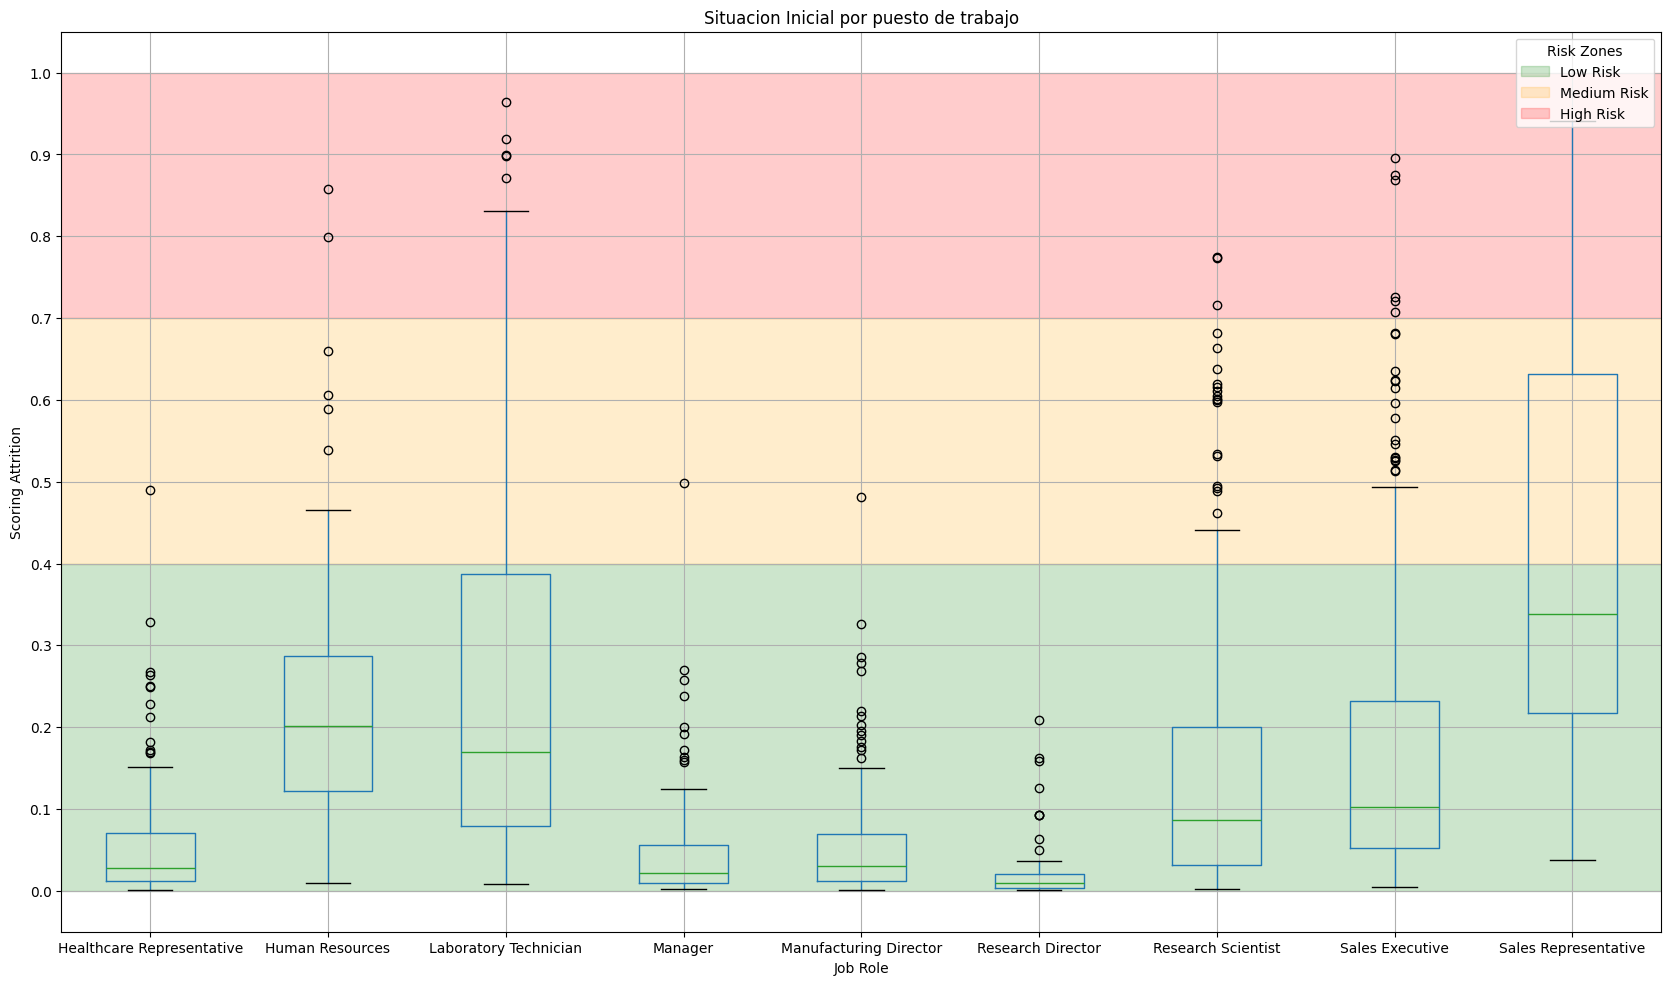

In [61]:
boxplot (df,"Situacion Inicial por puesto de trabajo")

In [62]:
get_total(df,'Department','Sit.Inicial: Trabajadores por Departamento')

,Department,num_empleados,impacto_economico_total,impacto_economico_medio,scoring_medio
0,Research & Development,961,14779977.40,15379.79,0.132996
1,Sales,446,7691252.74,17244.96,0.208436
2,Human Resources,63,1026633.26,16295.77,0.204917


In [63]:
get_total(df,'JobRole','Sit.Inicial: Trabajadores por Puesto de Trabajo')

,JobRole,num_empleados,impacto_economico_total,impacto_economico_medio,scoring_medio
0,Sales Executive,326,5624144.65,17251.98,0.170342
1,Manager,102,4416378.12,43297.82,0.047879
2,Research Director,80,3232363.68,40404.55,0.022860
3,Manufacturing Director,145,2639873.52,18206.02,0.058162
4,Healthcare Representative,131,2465967.48,18824.18,0.057552
5,Research Scientist,292,2183714.06,7478.47,0.147877
6,Laboratory Technician,259,1926962.89,7440.01,0.251329
7,Human Resources,52,525216.26,10100.31,0.238073
8,Sales Representative,83,483242.72,5822.20,0.419407


## 5.2 Situacion final 

### 5.2.1 Empleados inactivos 

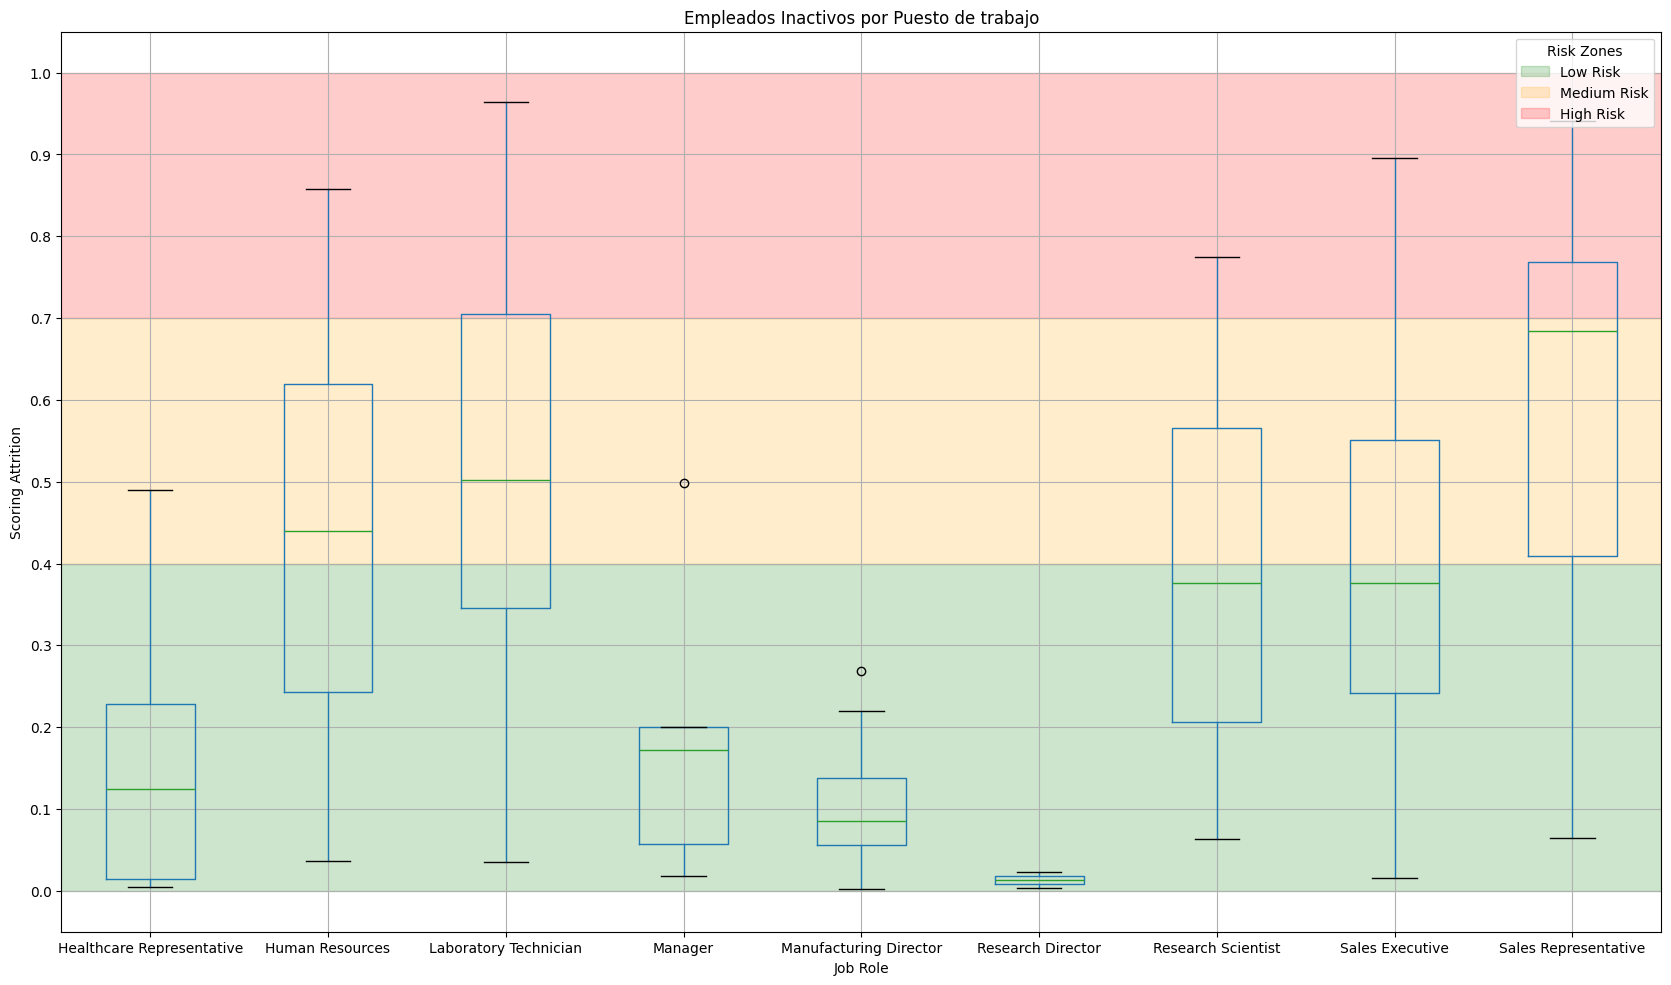

In [64]:
boxplot (df_att,"Empleados Inactivos por Puesto de trabajo")

In [65]:
get_total(df_att,'Department','Trabajadores Inactivos por Departamento')

,Department,num_empleados,impacto_economico_total,impacto_economico_medio,scoring_medio
0,Sales,92,1333092.98,14490.14,0.474277
1,Research & Development,133,1281762.85,9637.31,0.396059
2,Human Resources,12,104150.08,8679.17,0.453541


In [66]:
get_total(df_att,'JobRole','Trabajadores Inactivos por Puesto de Trabajo')

,JobRole,num_empleados,impacto_economico_total,impacto_economico_medio,scoring_medio
0,Sales Executive,57,1066355.86,18708.00,0.398865
1,Laboratory Technician,62,406290.10,6553.07,0.514614
2,Research Scientist,47,286201.79,6089.40,0.380102
3,Manager,5,211647.24,42329.45,0.189385
4,Healthcare Representative,9,193529.74,21503.30,0.154300
5,Manufacturing Director,10,183786.55,18378.66,0.105992
6,Sales Representative,33,169291.25,5130.04,0.617608
7,Human Resources,12,104150.08,8679.17,0.453541
8,Research Director,2,97753.32,48876.66,0.013285


### 5.2.2 Empleados Activos

#### 5.2.2.1 Empleados Activos Seguros

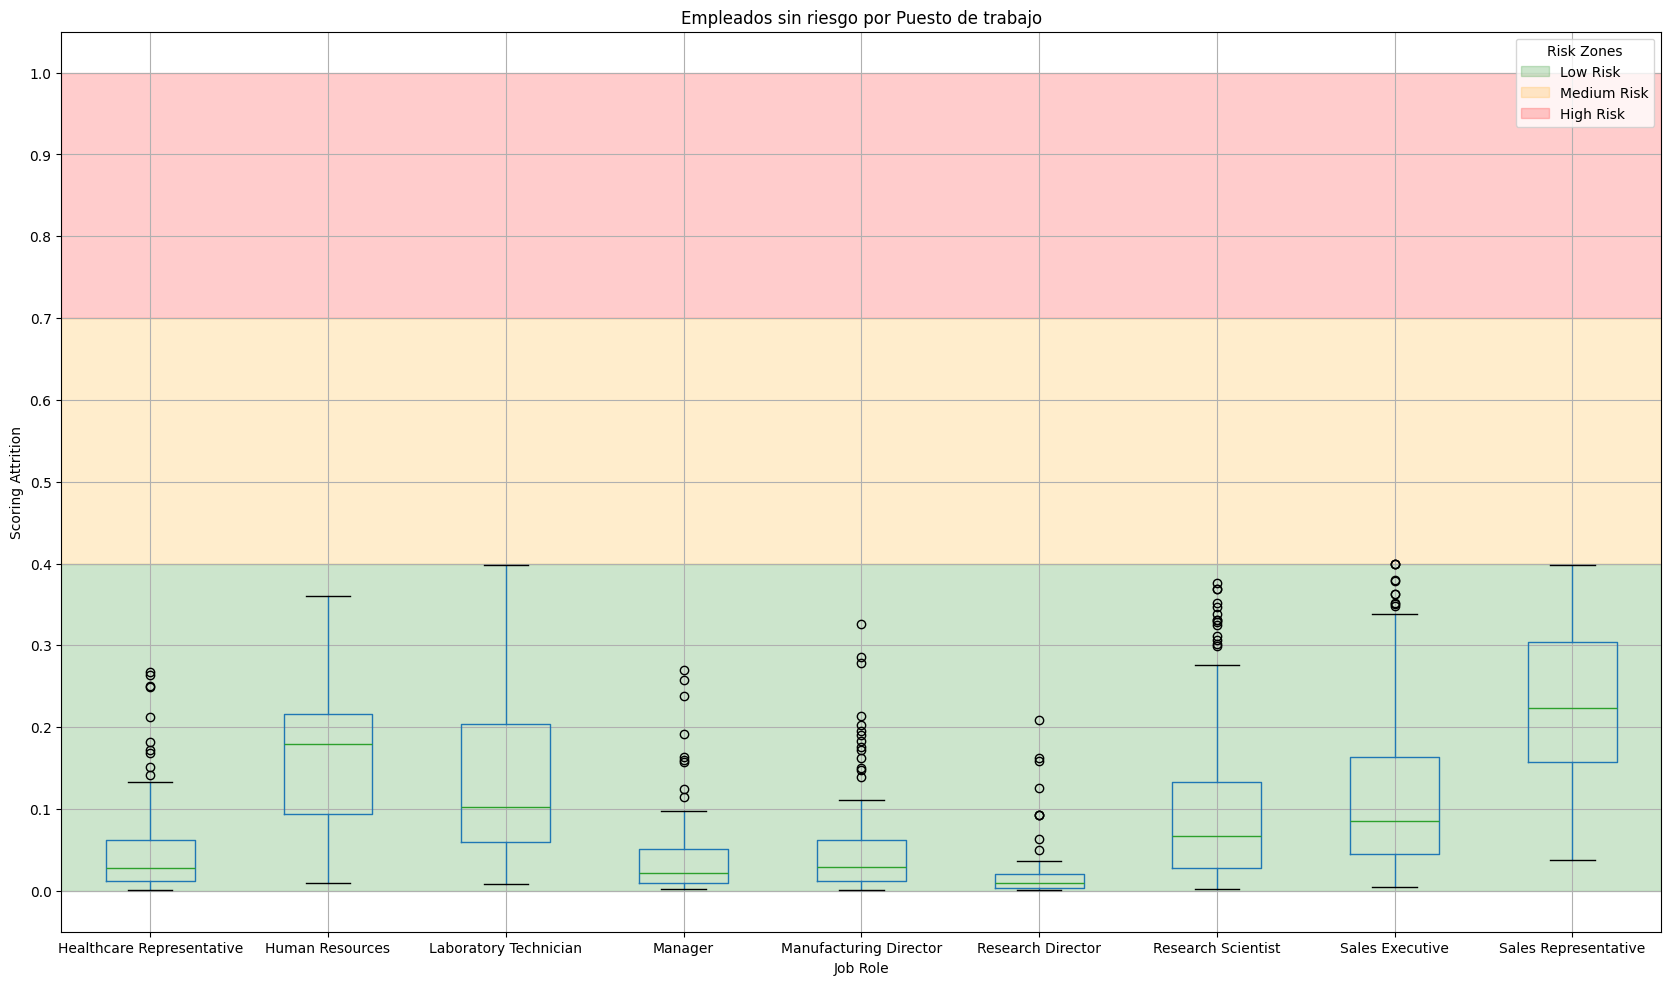

In [67]:
boxplot (no_risk,"Empleados sin riesgo por Puesto de trabajo")

In [68]:
get_total(no_risk,'Department','Trabajadores Sin riesgo por Puesto de Trabajo')

,Department,num_empleados,impacto_economico_total,impacto_economico_medio,scoring_medio
0,Research & Development,805,13295743.27,16516.45,0.078830
1,Sales,339,6204521.09,18302.42,0.122135
2,Human Resources,50,918084.02,18361.68,0.138569


In [69]:
get_total(no_risk,'JobRole','Trabajadores Sin riesgo por Puesto de Trabajo')

,JobRole,num_empleados,impacto_economico_total,impacto_economico_medio,scoring_medio
0,Sales Executive,263,4460088.96,16958.51,0.114347
1,Manager,97,4204730.88,43347.74,0.040585
2,Research Director,78,3134610.36,40187.31,0.023105
3,Manufacturing Director,134,2430360.29,18137.02,0.051434
4,Healthcare Representative,122,2272437.74,18626.54,0.050415
5,Research Scientist,239,1850604.08,7743.11,0.093908
6,Laboratory Technician,181,1390836.40,7684.18,0.137381
7,Human Resources,39,416667.02,10683.77,0.164064
8,Sales Representative,41,258012.65,6292.99,0.225058


#### 5.2.2.2 Empleados Activos en Riesgo

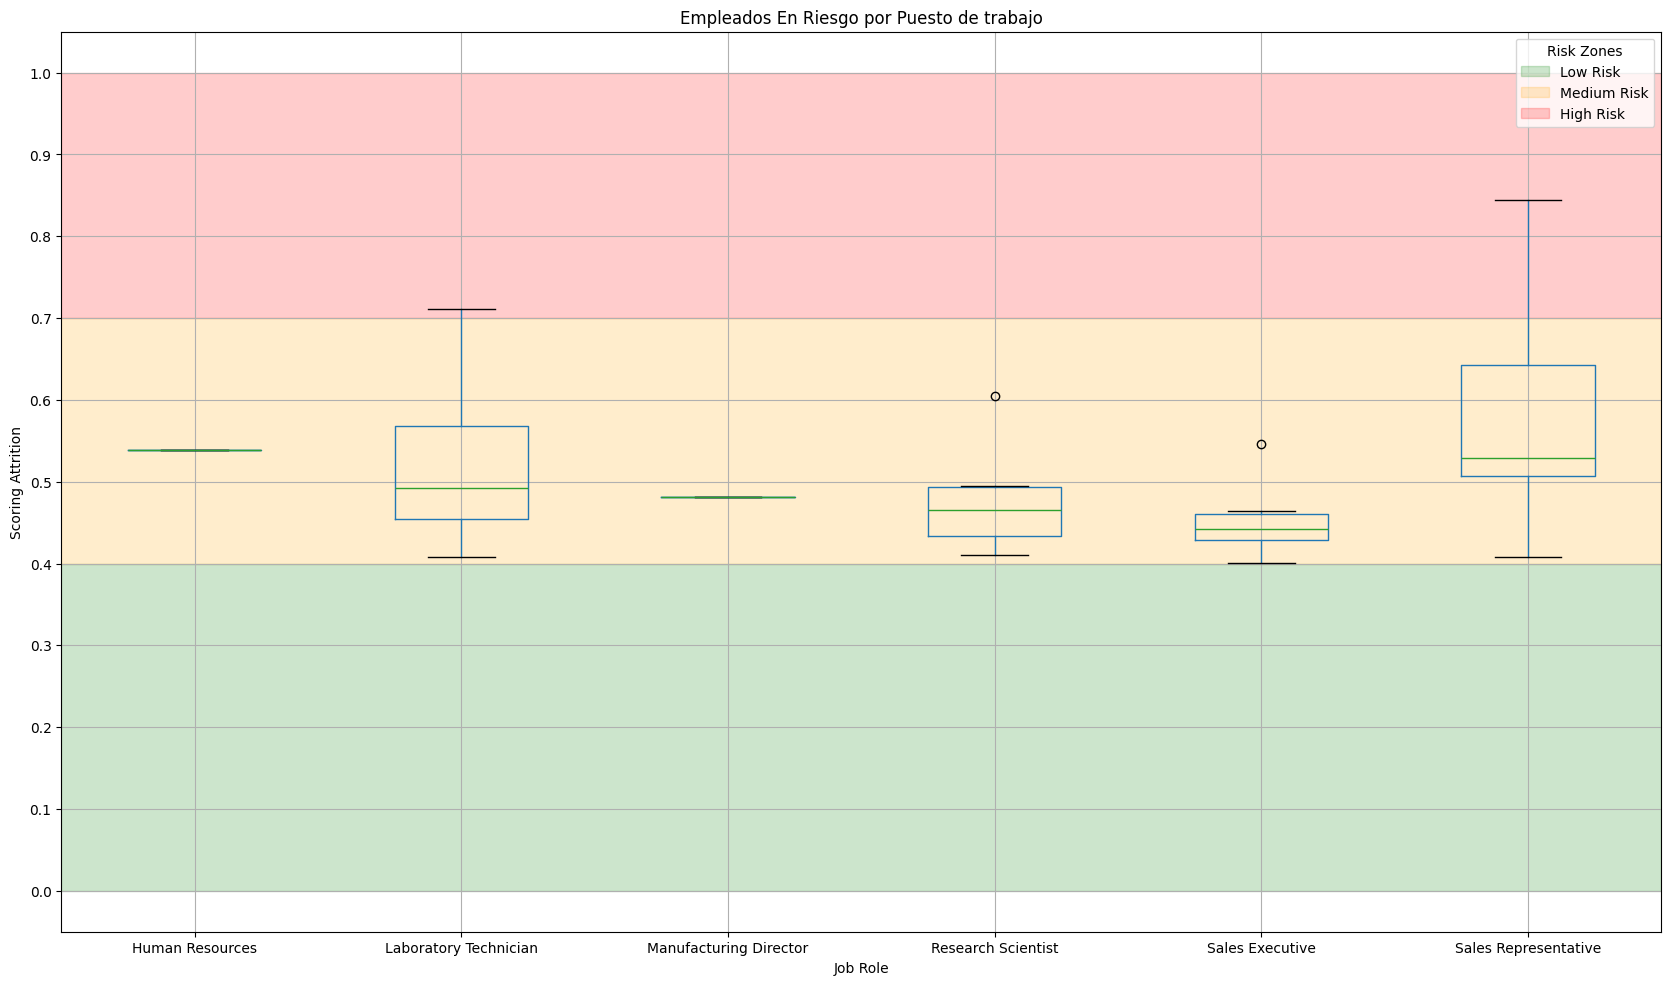

In [70]:
boxplot (in_risk,"Empleados En Riesgo por Puesto de trabajo")

In [71]:
get_total(in_risk,'Department','Trabajadores En Riesgo por Puesto de Trabajo')

,Department,num_empleados,impacto_economico_total,impacto_economico_medio,scoring_medio
0,Research & Development,23,202471.27,8803.10,0.507620
1,Sales,15,153638.66,10242.58,0.528357
2,Human Resources,1,4399.16,4399.16,0.538828


In [72]:
get_total(in_risk,'JobRole','Trabajadores En Riesgo por Puesto de Trabajo')

,JobRole,num_empleados,impacto_economico_total,impacto_economico_medio,scoring_medio
0,Laboratory Technician,16,129836.40,8114.78,0.520146
1,Sales Executive,6,97699.84,16283.31,0.453836
2,Sales Representative,9,55938.83,6215.43,0.578038
3,Research Scientist,6,46908.19,7818.03,0.478579
4,Manufacturing Director,1,25726.68,25726.68,0.481434
5,Human Resources,1,4399.16,4399.16,0.538828


# 6 Analisis por Puestos en Riesgo

In [73]:
# Definicion de metricas y dimensiones
metricas = ['scoring_attrition']
dim_separation = separation_vars_grouped[['Grupo', 'Variable']].drop_duplicates().sort_values('Grupo')
dim_retention = retention_vars_grouped[['Grupo', 'Variable']].drop_duplicates().sort_values('Grupo')

In [74]:
in_risk.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'annual_salary',
       'economic_impact', 'JobRoleLevel', 'scoring_attrition'],
      dtype='object')

In [75]:
df_att['JobRoleLevel'].value_counts()

JobRoleLevel
Professional    116
Operational      95
Executive        21
Managerial        5
Name: count, dtype: int64

# 6.1 Analisis por Jerarquia de Puestos

# 6.1.1 Managerial

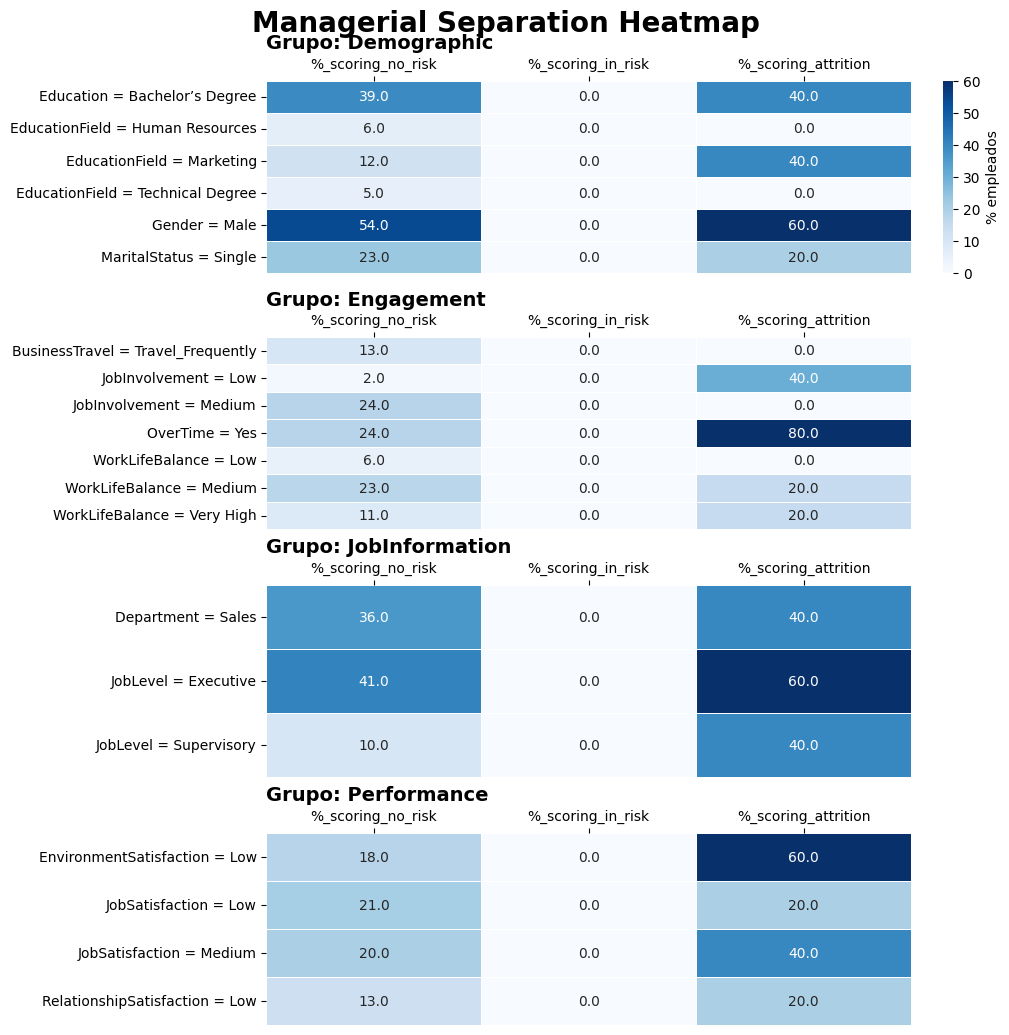

In [76]:
### >>> SEPARATION VARIABLES <<<

# In Risk
JobRoleLevel_Managerial_In_Risk_Sep = in_risk[in_risk['JobRoleLevel']=='Managerial']
JobRoleLevel_Managerial_In_Risk_Sep = crear_minicubo(JobRoleLevel_Managerial_In_Risk_Sep,dim_separation,metricas)
perfil_ajustado(JobRoleLevel_Managerial_In_Risk_Sep, separation_vars_grouped)

#No_Risk
JobRoleLevel_Managerial_No_Risk_Sep = no_risk[no_risk['JobRoleLevel']=='Managerial']
JobRoleLevel_Managerial_No_Risk_Sep = crear_minicubo(JobRoleLevel_Managerial_No_Risk_Sep,dim_separation,metricas)
perfil_ajustado(JobRoleLevel_Managerial_No_Risk_Sep, separation_vars_grouped)

# Attrition

JobRoleLevel_Managerial_Attrition_Sep = df_att[df_att['JobRoleLevel']=='Managerial']
JobRoleLevel_Managerial_Attrition_Sep = crear_minicubo(JobRoleLevel_Managerial_Attrition_Sep,dim_separation,metricas)
perfil_ajustado(JobRoleLevel_Managerial_Attrition_Sep,separation_vars_grouped)
JobRoleLevel_Managerial_Comp_Sep = combinar_perfiles(JobRoleLevel_Managerial_In_Risk_Sep,
                                             JobRoleLevel_Managerial_No_Risk_Sep,
                                             JobRoleLevel_Managerial_Attrition_Sep,
                                             separation_vars_grouped)

JobRoleLevel_Managerial_Comp_Sep['Grupo'] = JobRoleLevel_Managerial_Comp_Sep['variable'].map(variable_to_group)
JobRoleLevel_Managerial_Comp_Sep = JobRoleLevel_Managerial_Comp_Sep.sort_values(by=['Grupo', 'variable'])
JobRoleLevel_Managerial_Comp_Sep[['Grupo','variable','value','%_scoring_in_risk','%_scoring_no_risk','%_scoring_attrition']]
heatmap_Jobrole(JobRoleLevel_Managerial_Comp_Sep, "Managerial Separation Heatmap" )

##### Intepretacion
No hay trabajadores en riesgo

# 6.1.2 Executive

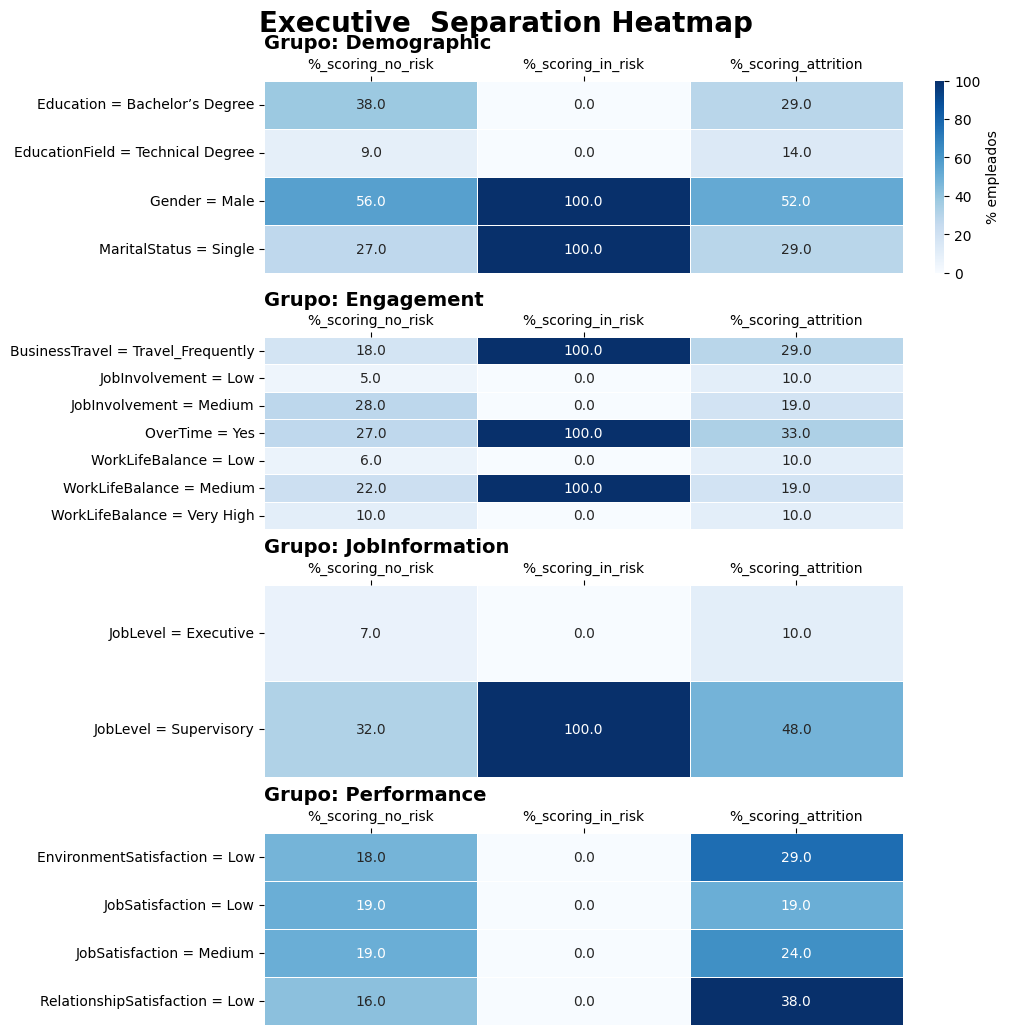

In [77]:
### >>> SEPARATION VARIABLES <<<

# In Risk
JobRoleLevel_Executive_In_Risk_Sep = in_risk[in_risk['JobRoleLevel']=='Executive']
JobRoleLevel_Executive_In_Risk_Sep = crear_minicubo(JobRoleLevel_Executive_In_Risk_Sep,dim_separation,metricas)
perfil_ajustado(JobRoleLevel_Executive_In_Risk_Sep, separation_vars_grouped)

#No_Risk
JobRoleLevel_Executive_No_Risk_Sep = no_risk[no_risk['JobRoleLevel']=='Executive']
JobRoleLevel_Executive_No_Risk_Sep = crear_minicubo(JobRoleLevel_Executive_No_Risk_Sep,dim_separation,metricas)
perfil_ajustado(JobRoleLevel_Executive_No_Risk_Sep, separation_vars_grouped)

# Attrition

JobRoleLevel_Executive_Attrition_Sep = df_att[df_att['JobRoleLevel']=='Executive']
JobRoleLevel_Executive_Attrition_Sep = crear_minicubo(JobRoleLevel_Executive_Attrition_Sep,dim_separation,metricas)
perfil_ajustado(JobRoleLevel_Executive_Attrition_Sep,separation_vars_grouped)
JobRoleLevel_Executive_Comp_Sep = combinar_perfiles(JobRoleLevel_Executive_In_Risk_Sep,
                                             JobRoleLevel_Executive_No_Risk_Sep,
                                             JobRoleLevel_Executive_Attrition_Sep,
                                             separation_vars_grouped)

JobRoleLevel_Executive_Comp_Sep['Grupo'] = JobRoleLevel_Executive_Comp_Sep['variable'].map(variable_to_group)
JobRoleLevel_Executive_Comp_Sep = JobRoleLevel_Executive_Comp_Sep.sort_values(by=['Grupo', 'variable'])
JobRoleLevel_Executive_Comp_Sep[['Grupo','variable','value','%_scoring_in_risk','%_scoring_no_risk','%_scoring_attrition']]
heatmap_Jobrole(JobRoleLevel_Executive_Comp_Sep, "Executive  Separation Heatmap" )

In [78]:
in_risk[in_risk['JobRoleLevel']=='Executive']

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,annual_salary,economic_impact,JobRoleLevel,scoring_attrition
1062,44,No,Travel_Frequently,1193,Research & Development,2,High School,Medical,1496,Medium,...,2,Medium,2,2,2,2,122508,25726.68,Executive,0.481434


##### Interpretacion

Estudiar su caso aisladamente

## 6.1.3 Professional

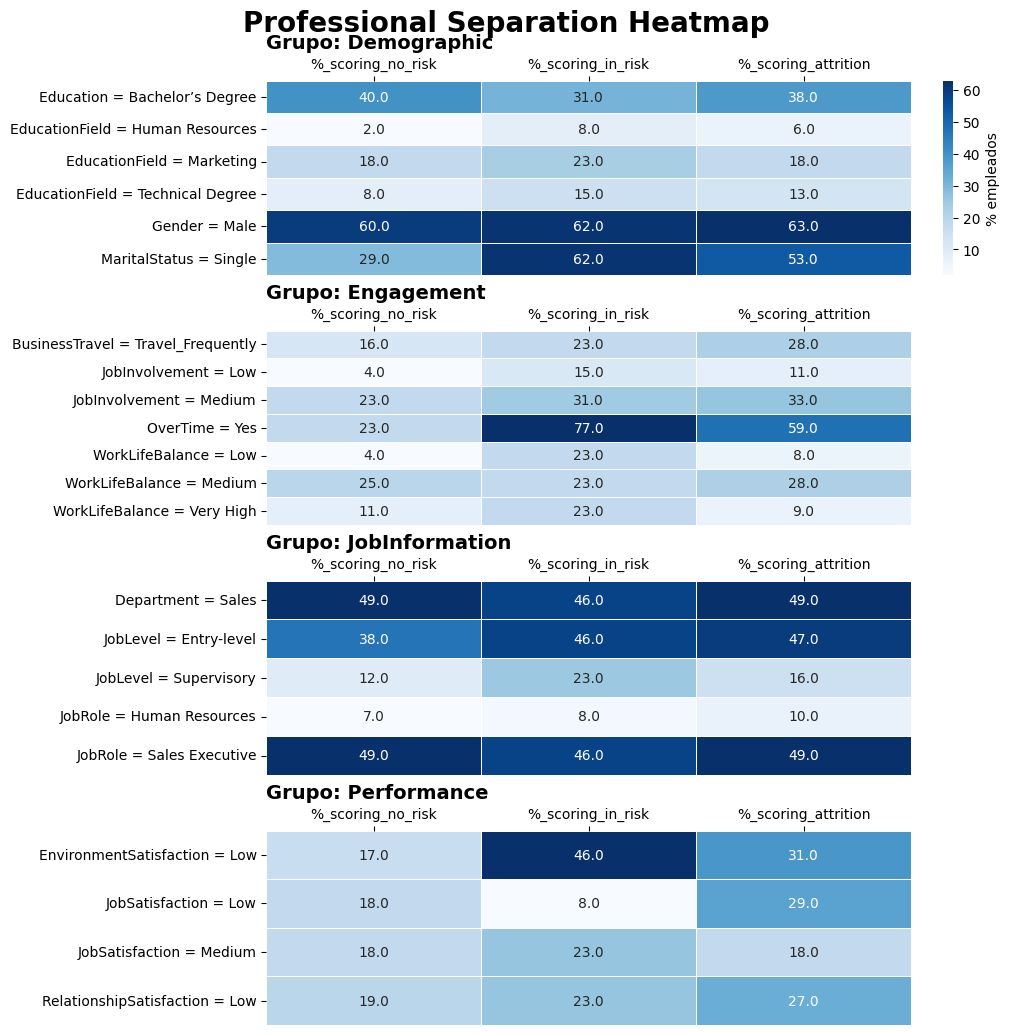

In [79]:
### >>> SEPARATION VARIABLES <<<

# In Risk
JobRoleLevel_Professional_In_Risk_Sep = in_risk[in_risk['JobRoleLevel']=='Professional']
JobRoleLevel_Professional_In_Risk_Sep = crear_minicubo(JobRoleLevel_Professional_In_Risk_Sep,dim_separation,metricas)
perfil_ajustado(JobRoleLevel_Professional_In_Risk_Sep, separation_vars_grouped)

#No_Risk
JobRoleLevel_Professional_No_Risk_Sep = no_risk[no_risk['JobRoleLevel']=='Professional']
JobRoleLevel_Professional_No_Risk_Sep = crear_minicubo(JobRoleLevel_Professional_No_Risk_Sep,dim_separation,metricas)
perfil_ajustado(JobRoleLevel_Professional_No_Risk_Sep, separation_vars_grouped)

# Attrition

JobRoleLevel_Professional_Attrition_Sep = df_att[df_att['JobRoleLevel']=='Professional']
JobRoleLevel_Professional_Attrition_Sep = crear_minicubo(JobRoleLevel_Professional_Attrition_Sep,dim_separation,metricas)
perfil_ajustado(JobRoleLevel_Professional_Attrition_Sep,separation_vars_grouped)
JobRoleLevel_Professional_Comp_Sep = combinar_perfiles(JobRoleLevel_Professional_In_Risk_Sep,
                                             JobRoleLevel_Professional_No_Risk_Sep,
                                             JobRoleLevel_Professional_Attrition_Sep,
                                             separation_vars_grouped)

JobRoleLevel_Professional_Comp_Sep['Grupo'] = JobRoleLevel_Professional_Comp_Sep['variable'].map(variable_to_group)
JobRoleLevel_Professional_Comp_Sep = JobRoleLevel_Professional_Comp_Sep.sort_values(by=['Grupo', 'variable'])
JobRoleLevel_Professional_Comp_Sep[['Grupo','variable','value','%_scoring_in_risk','%_scoring_no_risk','%_scoring_attrition']]
heatmap_Jobrole(JobRoleLevel_Professional_Comp_Sep, "Professional Separation Heatmap" )

######
<U>***El perfil general de Abandono de trabajo Profesional es:***</U>

**1 Demografica [Demographic]**
- Un varon, soltero, con una licenciatura en marketing, una carrera tecnica o en HHRR.

**2 Compromiso [Engagement]**

- Una implicacion en el trabajo MEDIA.
- Un equilibrio de vida BAJO
- Realiza horas extras.
- Viaja frecuentemente.

**3 Informacion del puesto laboral:**
- El departamento de ventas y el puesto de trabajo en HHRR y Sales Executive y señalado como critico por el algoritmo.
- El abandono se produce en los niveles Supervisory y Entry-Level

**4 Desempeño:**
- La satisfaccion con las relaciones interpersonales es BAJA.

# Operational

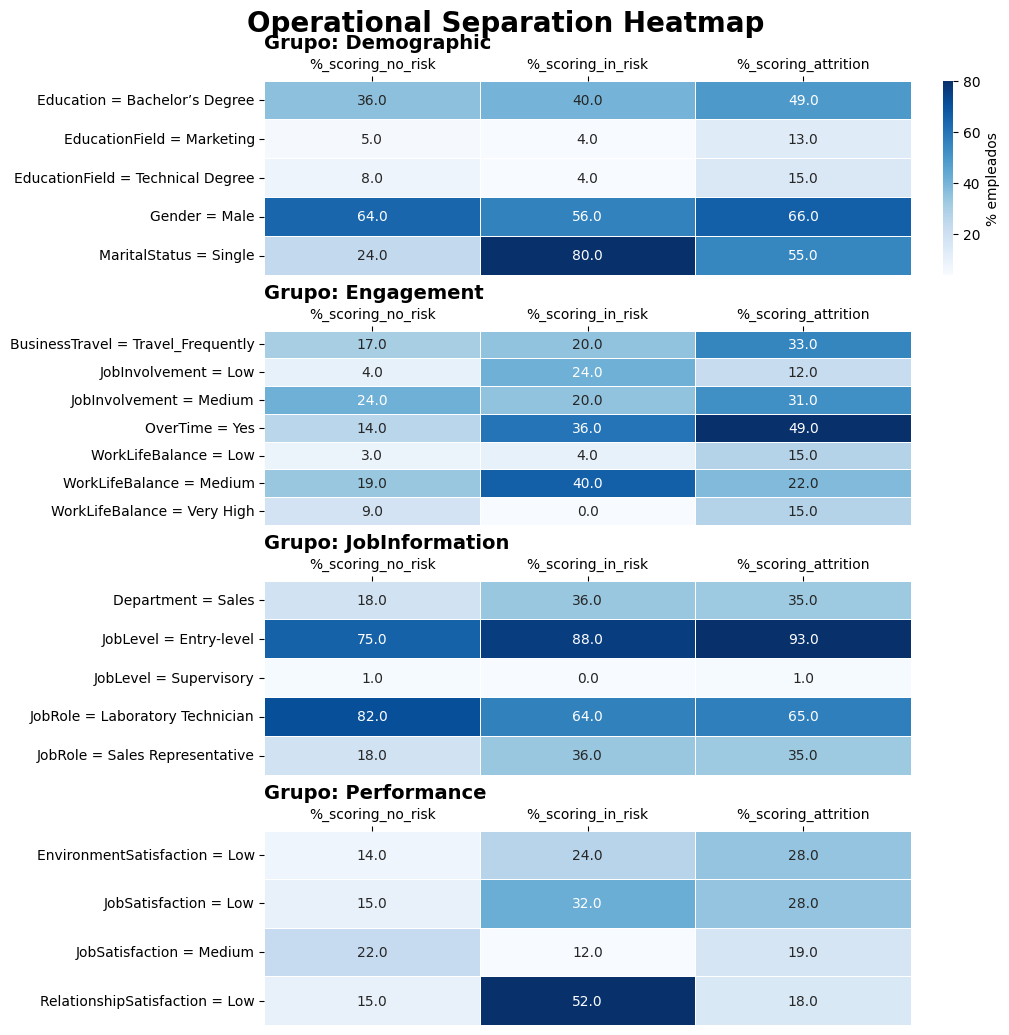

In [80]:
### >>> SEPARATION VARIABLES <<<

# In Risk
JobRoleLevel_Operational_In_Risk_Sep = in_risk[in_risk['JobRoleLevel']=='Operational']
JobRoleLevel_Operational_In_Risk_Sep = crear_minicubo(JobRoleLevel_Operational_In_Risk_Sep,dim_separation,metricas)
perfil_ajustado(JobRoleLevel_Operational_In_Risk_Sep, separation_vars_grouped)

#No_Risk
JobRoleLevel_Operational_No_Risk_Sep = no_risk[no_risk['JobRoleLevel']=='Operational']
JobRoleLevel_Operational_No_Risk_Sep = crear_minicubo(JobRoleLevel_Operational_No_Risk_Sep,dim_separation,metricas)
perfil_ajustado(JobRoleLevel_Operational_No_Risk_Sep, separation_vars_grouped)

# Attrition

JobRoleLevel_Operational_Attrition_Sep = df_att[df_att['JobRoleLevel']=='Operational']
JobRoleLevel_Operational_Attrition_Sep = crear_minicubo(JobRoleLevel_Operational_Attrition_Sep,dim_separation,metricas)
perfil_ajustado(JobRoleLevel_Operational_Attrition_Sep,separation_vars_grouped)
JobRoleLevel_Operational_Comp_Sep = combinar_perfiles(JobRoleLevel_Operational_In_Risk_Sep,
                                             JobRoleLevel_Operational_No_Risk_Sep,
                                             JobRoleLevel_Operational_Attrition_Sep,
                                             separation_vars_grouped)

JobRoleLevel_Operational_Comp_Sep['Grupo'] = JobRoleLevel_Operational_Comp_Sep['variable'].map(variable_to_group)
JobRoleLevel_Operational_Comp_Sep = JobRoleLevel_Operational_Comp_Sep.sort_values(by=['Grupo', 'variable'])
JobRoleLevel_Operational_Comp_Sep[['Grupo','variable','value','%_scoring_in_risk','%_scoring_no_risk','%_scoring_attrition']]
heatmap_Jobrole(JobRoleLevel_Operational_Comp_Sep, "Operational Separation Heatmap" )

<U>***El perfil general de Abandono de trabajo Operacional es:***</U>

**1 Demografica [Demographic]**
- Un varon, soltero

**2 Compromiso [Engagement]**

- Una implicacion en el trabajo BAJA.
- Un equilibrio de vida MEDIO.
- Realiza horas extras.


**3 Informacion del puesto laboral:**
- El departamento de ventas y el puesto de trabajo  Sales Executive y Laboratory Technician señalado como critico por el algoritmo.
- El abandono se produce en los niveles Supervisory y Entry-Level

**4 Desempeño:**
- La satisfaccion con el empleo es baja.
- La satisfaccion con las relaciones interpersonales es BAJA.

## 6.1 Departamento Sales

### 6.1.1 Sales Executive

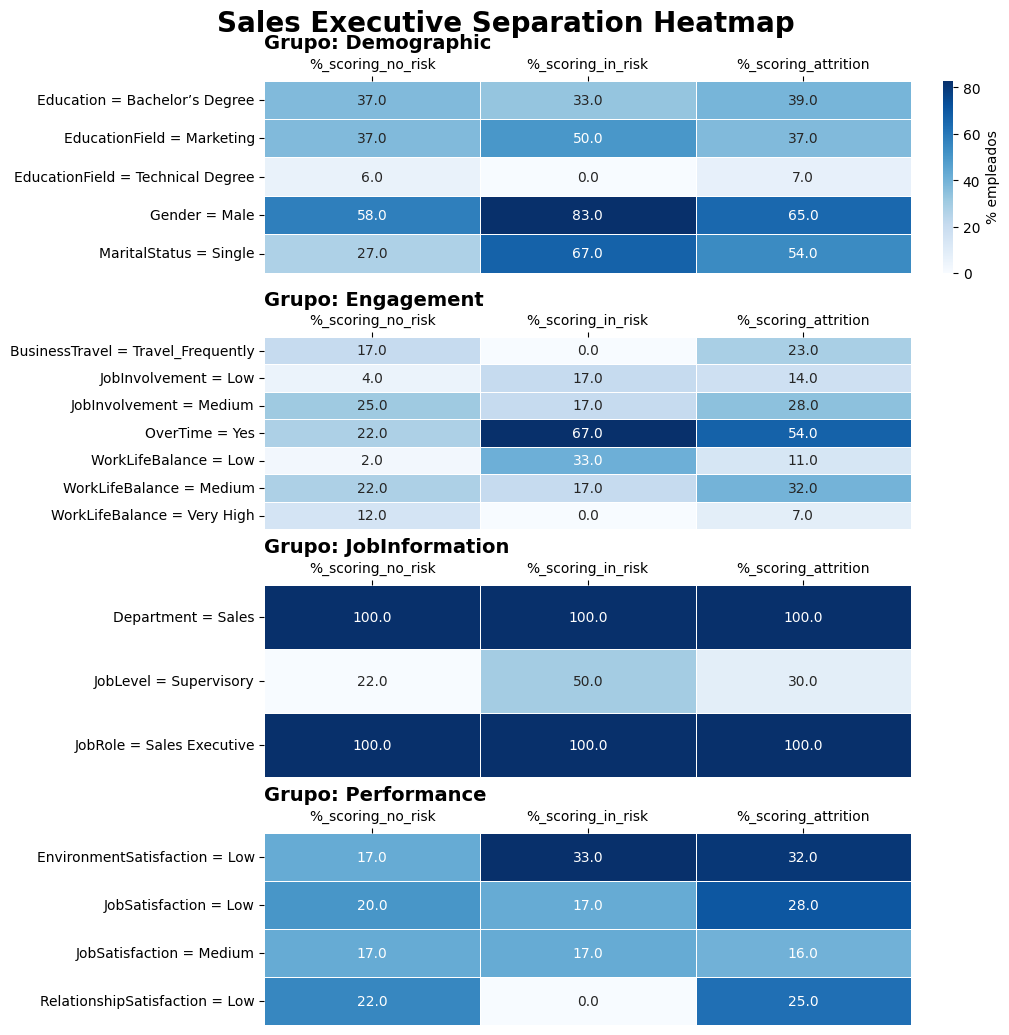

In [81]:
### >>> SEPARATION VARIABLES <<<

# In Risk
Sales_Executive_In_Risk_Sep = in_risk[in_risk['JobRole']=='Sales Executive']
Sales_Executive_In_Risk_Sep = crear_minicubo(Sales_Executive_In_Risk_Sep,dim_separation,metricas)
perfil_ajustado(Sales_Executive_In_Risk_Sep, separation_vars_grouped)

#No_Risk
Sales_Executive_No_Risk_Sep = no_risk[no_risk['JobRole']=='Sales Executive']
Sales_Executive_No_Risk_Sep = crear_minicubo(Sales_Executive_No_Risk_Sep,dim_separation,metricas)
perfil_ajustado(Sales_Executive_No_Risk_Sep, separation_vars_grouped)

# Attrition

Sales_Executive_Attrition_Sep = df_att[df_att['JobRole']=='Sales Executive']
Sales_Executive_Attrition_Sep = crear_minicubo(Sales_Executive_Attrition_Sep,dim_separation,metricas)
perfil_ajustado(Sales_Executive_Attrition_Sep,separation_vars_grouped)
Sales_Executive_Comp_Sep = combinar_perfiles(Sales_Executive_In_Risk_Sep,
                                             Sales_Executive_No_Risk_Sep,
                                             Sales_Executive_Attrition_Sep,
                                             separation_vars_grouped)

Sales_Executive_Comp_Sep['Grupo'] = Sales_Executive_Comp_Sep['variable'].map(variable_to_group)
Sales_Executive_Comp_Sep = Sales_Executive_Comp_Sep.sort_values(by=['Grupo', 'variable'])
Sales_Executive_Comp_Sep[['Grupo','variable','value','%_scoring_in_risk','%_scoring_no_risk','%_scoring_attrition']]
heatmap_Jobrole(Sales_Executive_Comp_Sep, "Sales Executive Separation Heatmap" )

<U>***El perfil general de Abandono de trabajo Sales_Executive es:***</U>

**1 Demografica [Demographic]**
- Un varon, soltero, con una licenciatura en marketing.

**2 Compromiso [Engagement]**

Manifiesta:
- Una implicacion en el trabajo MEDIA o BAJA.
- Un equilibrio de vida BAJO o MEDIO.
- Realiza horas extras.

**3 Informacion del puesto laboral:**
- El departamento de ventas y el puesto de trabajo es señalado como critico por el algoritmo.
- El abandono se produce en los niveles Supervisory y Executive.

**4 Desempeño:**
- La satisfaccion laboral es BAJA.
- La satisfaccion con las relaciones interpersonales es BAJA.

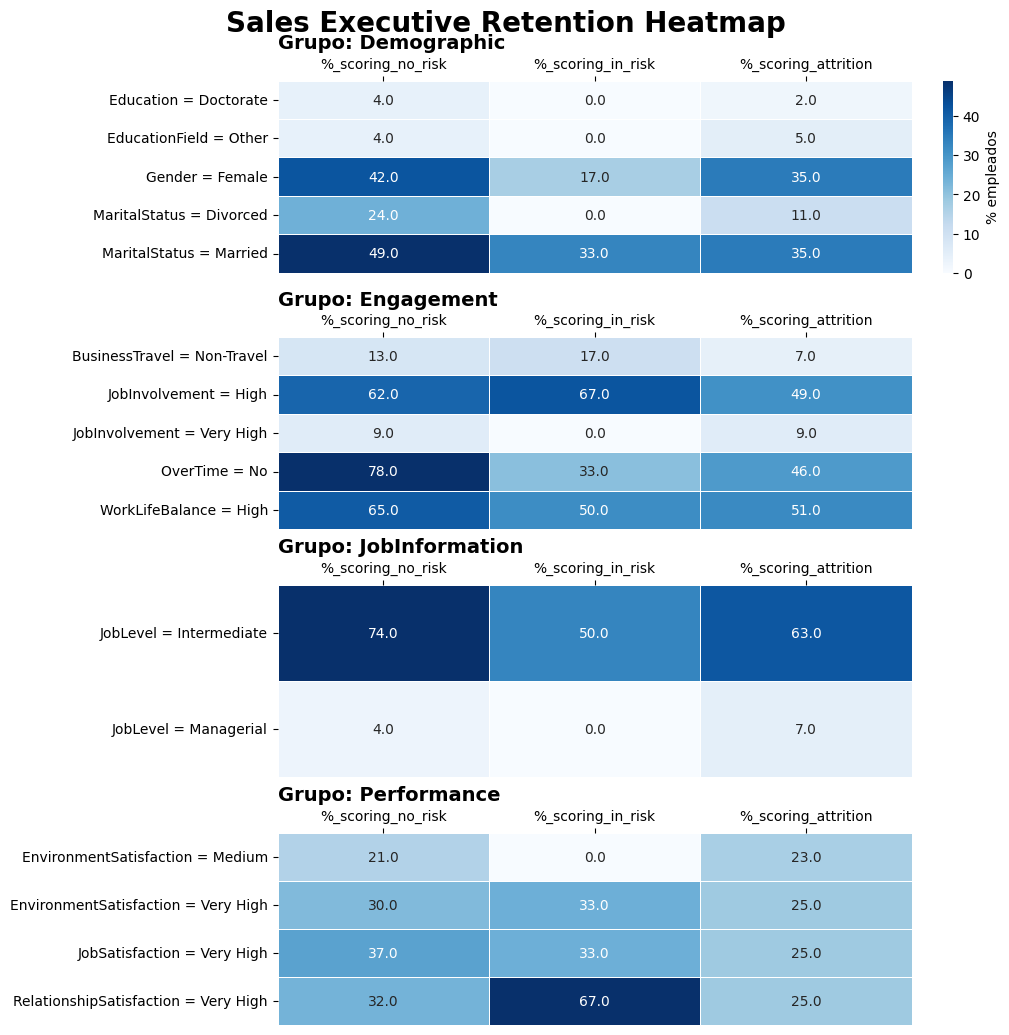

In [82]:
### >>> RETENTION VARIABLES <<<

# In Risk
Sales_Executive_In_Risk_Ret = in_risk[in_risk['JobRole']=='Sales Executive']
Sales_Executive_In_Risk_Ret = crear_minicubo(Sales_Executive_In_Risk_Ret,dim_retention,metricas)
perfil_ajustado(Sales_Executive_In_Risk_Ret, retention_vars_grouped)

#No_Risk
Sales_Executive_No_Risk_Ret = no_risk[no_risk['JobRole']=='Sales Executive']
Sales_Executive_No_Risk_Ret = crear_minicubo(Sales_Executive_No_Risk_Ret,dim_retention,metricas)
perfil_ajustado(Sales_Executive_No_Risk_Ret, retention_vars_grouped)

# Attrition

Sales_Executive_Attrition_Ret = df_att[df_att['JobRole']=='Sales Executive']
Sales_Executive_Attrition_Ret = crear_minicubo(Sales_Executive_Attrition_Ret,dim_retention,metricas)
perfil_ajustado(Sales_Executive_Attrition_Ret,retention_vars_grouped)
Sales_Executive_Comp_Ret = combinar_perfiles(Sales_Executive_In_Risk_Ret,
                                             Sales_Executive_No_Risk_Ret,
                                             Sales_Executive_Attrition_Ret,
                                             retention_vars_grouped)

Sales_Executive_Comp_Ret['Grupo'] = Sales_Executive_Comp_Ret['variable'].map(variable_to_group)
Sales_Executive_Comp_Ret = Sales_Executive_Comp_Ret.sort_values(by=['Grupo', 'variable'])
Sales_Executive_Comp_Ret[['Grupo','variable','value','%_scoring_in_risk','%_scoring_no_risk','%_scoring_attrition']]
heatmap_Jobrole(Sales_Executive_Comp_Ret, "Sales Executive Retention Heatmap" )

In [83]:
filtered = df_att[(df_att['JobRole'] == 'Sales Executive')]

mode_by_jobrole(filtered, column_groups_final)

,Grupo,Variable,Moda
0,Demographic,Age,35.0
1,Demographic,Gender,Male
2,Demographic,MaritalStatus,Single
3,Demographic,Education,Bachelor’s Degree
4,Demographic,EducationField,Marketing
5,JobInformation,Department,Sales
6,JobInformation,JobLevel,Intermediate
7,JobInformation,JobRole,Sales Executive
8,JobInformation,DistanceFromHome,1.0
9,JobInformation,NumCompaniesWorked,1.0


**<U>Sales Executive Analisis Modas.</U>**

1.- Demografico
Varon joven casado,  con un licenciatura en Marketing

2.- Puesto Trabajo.
Senior en puesto intermerdio, con un alto desempeño en el trabajo.

3.- Performance.
Satisfaccion con el entorno laboral baja y satisfaccion con el trabajo son alta.
Las satisfaccion con las relaciones interpersonales es alta y su desempeño satisfactorio

4.- Compromiso

Balance vida-trabajo y desempeño en el trabajo alto.
Hace horas extras.
Viaja ocasionalmente.

### 6.1.2 Sales Representative

In [84]:
### >>> SEPARATION VARIABLES <<<

# In Risk
Sales_Representative_In_Risk_Sep = in_risk[in_risk['JobRole']=='Sales Representative']
Sales_Representative_In_Risk_Sep = crear_minicubo(Sales_Representative_In_Risk_Sep,dim_separation,metricas)
perfil_ajustado(Sales_Representative_In_Risk_Sep, separation_vars_grouped)

#No_Risk
Sales_Representative_No_Risk_Sep = no_risk[no_risk['JobRole']=='Sales Representative']
Sales_Representative_No_Risk_Sep = crear_minicubo(Sales_Representative_No_Risk_Sep,dim_separation,metricas)
perfil_ajustado(Sales_Representative_No_Risk_Sep, separation_vars_grouped)

# Attrition

SSales_Representative_Attrition_Sep = df_att[df_att['JobRole']=='Sales Representative']
SSales_Representative_Attrition_Sep = crear_minicubo(SSales_Representative_Attrition_Sep,dim_separation,metricas)
perfil_ajustado(SSales_Representative_Attrition_Sep,separation_vars_grouped)
Sales_Representative_Comp_Sep = combinar_perfiles(Sales_Representative_In_Risk_Sep,
                                             Sales_Representative_No_Risk_Sep,
                                             SSales_Representative_Attrition_Sep,
                                             separation_vars_grouped)

Sales_Representative_Comp_Sep ['Grupo'] = Sales_Representative_Comp_Sep ['variable'].map(variable_to_group)
Sales_Representative_Comp_Sep = Sales_Representative_Comp_Sep .sort_values(by=['Grupo', 'variable'])
Sales_Representative_Comp_Sep [['Grupo','variable','value','%_scoring_in_risk','%_scoring_no_risk','%_scoring_attrition']]
#heatmap_Jobrole(Sales_Representative_Comp_Sep, "Sales Representative Separation Heatmap" )

,Grupo,variable,value,%_scoring_in_risk,%_scoring_no_risk,%_scoring_attrition
0,Demographic,Education,Bachelor’s Degree,33.0,32.0,48.0
1,Demographic,EducationField,Marketing,11.0,24.0,36.0
2,Demographic,EducationField,Technical Degree,11.0,15.0,18.0
3,Demographic,Gender,Male,67.0,54.0,52.0
4,Demographic,MaritalStatus,Single,100.0,20.0,64.0
5,Engagement,BusinessTravel,Travel_Frequently,0.0,20.0,45.0
6,Engagement,JobInvolvement,Low,0.0,5.0,15.0
7,Engagement,JobInvolvement,Medium,33.0,17.0,30.0
8,Engagement,OverTime,Yes,33.0,12.0,48.0
9,Engagement,WorkLifeBalance,Low,0.0,2.0,0.0


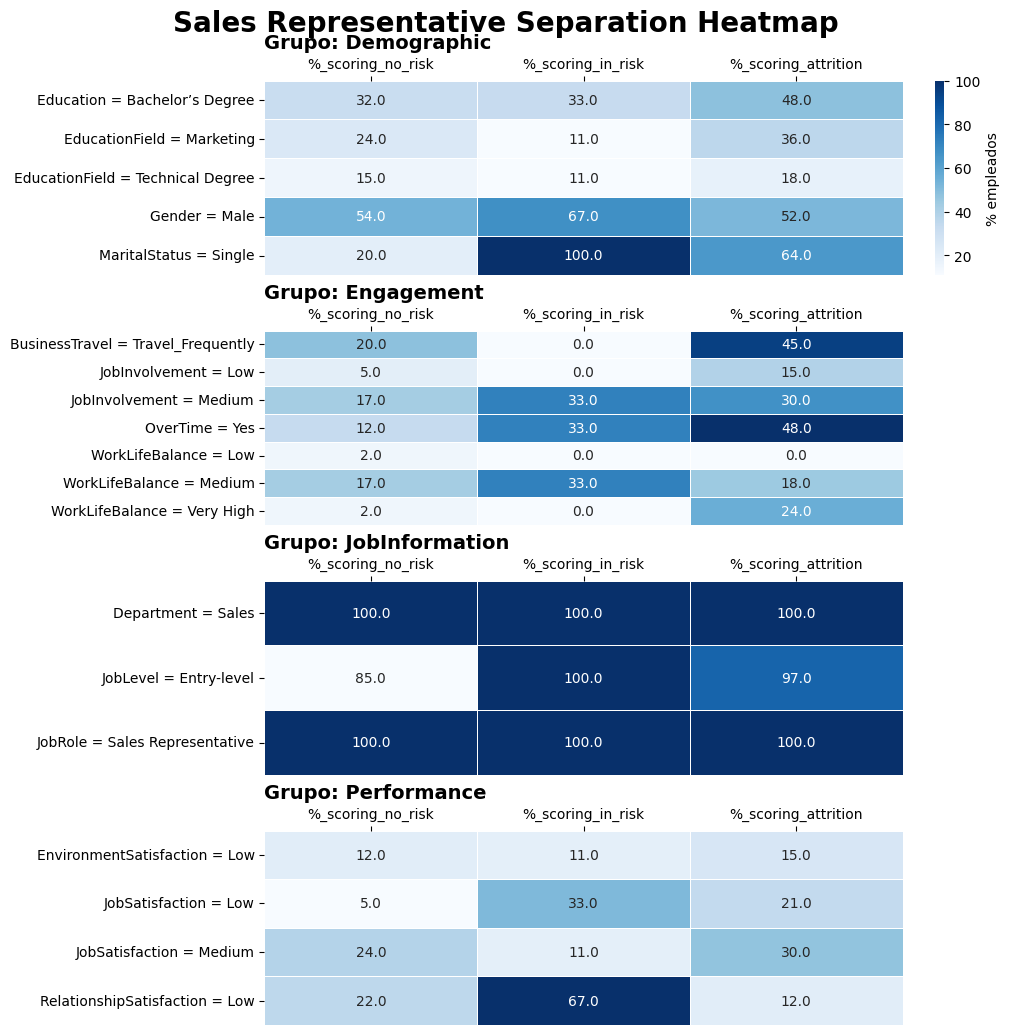

In [85]:
heatmap_Jobrole(Sales_Representative_Comp_Sep, "Sales Representative Separation Heatmap" )

In [86]:
Sales_Representative_Attrition_Sep = df_att[df_att['JobRole']=='Sales Representative']
Sales_Representative_Attrition_Sep['EducationField'].value_counts()

EducationField
Marketing           12
Life Sciences        9
Technical Degree     6
Medical              5
Other                1
Name: count, dtype: int64

<U>***El perfil general de Abandono de trabajo Sales_Representative es:***</U>

**1 Demografica [Demographic]**
- Un varon, soltero, licenciado en Marketing o Life Science.

**2 Compromiso [Engagement]**
- Manifiesta niveles medios de desempeño en el trabajo, y de equilibrio vida_trabajo.
- Realiza horas extras.

**3 Informacion del puesto laboral:**
- El departamento de ventas y el puesto de trabajo es señalado como critico por el algoritmo.
- El abandono se produce en los niveles Entry_level.

**4 Desempeño:**
- La satisfaccion con las relaciones interpersonales es BAJA.

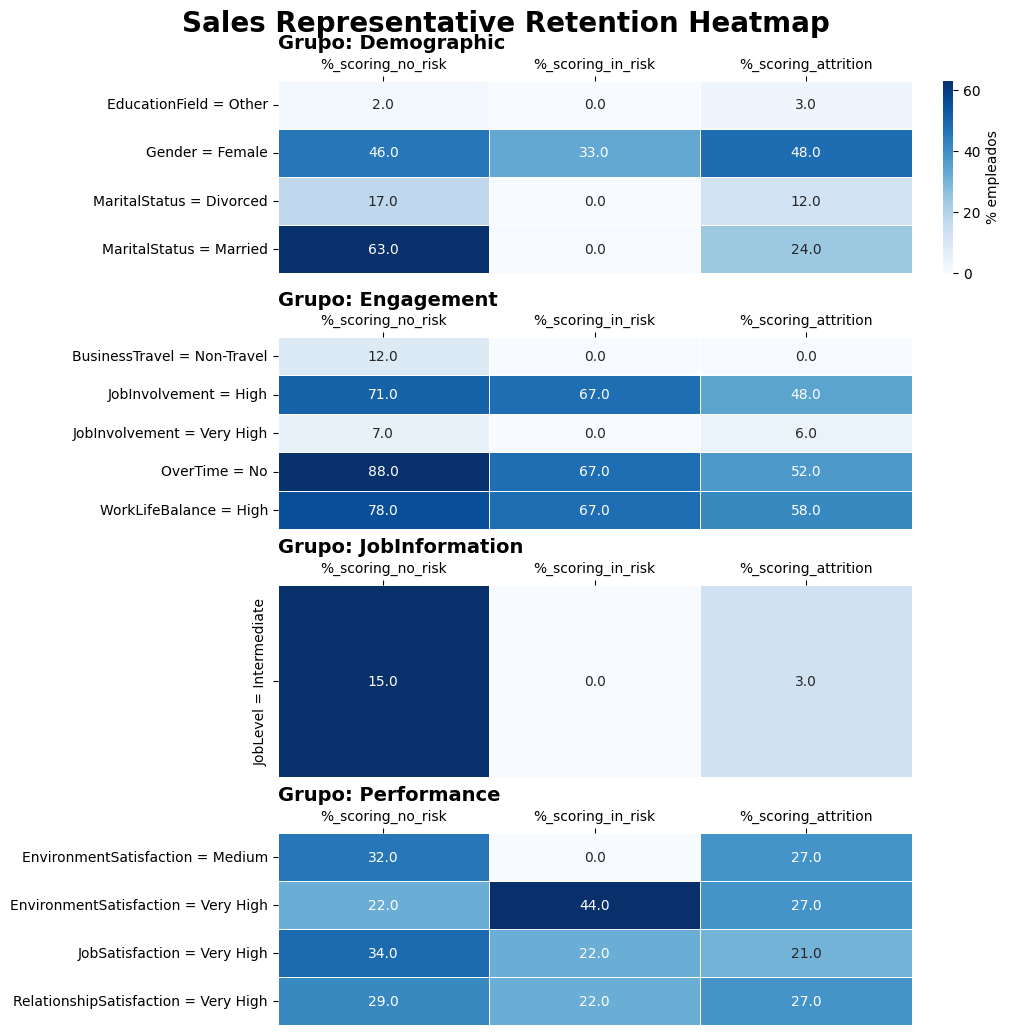

In [87]:
### >>> RETENTION VARIABLES <<<

# In Risk
Sales_Representative_In_Risk_Ret = in_risk[in_risk['JobRole']=='Sales Representative']
Sales_Representative_In_Risk_Ret = crear_minicubo(Sales_Representative_In_Risk_Ret,dim_retention,metricas)
perfil_ajustado(Sales_Representative_In_Risk_Ret, retention_vars_grouped)

#No_Risk
Sales_Representative_No_Risk_Ret = no_risk[no_risk['JobRole']=='Sales Representative']
Sales_Representative_No_Risk_Ret = crear_minicubo(Sales_Representative_No_Risk_Ret,dim_retention,metricas)
perfil_ajustado(Sales_Representative_No_Risk_Ret, retention_vars_grouped)

# Attrition

Sales_Representative_Attrition_Ret = df_att[df_att['JobRole']=='Sales Representative']
Sales_Representative_Attrition_Ret = crear_minicubo(Sales_Representative_Attrition_Ret,dim_retention,metricas)
perfil_ajustado(Sales_Representative_Attrition_Ret,retention_vars_grouped)
Sales_Representative_Comp_Ret = combinar_perfiles(Sales_Representative_In_Risk_Ret,
                                             Sales_Representative_No_Risk_Ret,
                                             Sales_Representative_Attrition_Ret,
                                             retention_vars_grouped)

Sales_Representative_Comp_Ret['Grupo'] = Sales_Representative_Comp_Ret['variable'].map(variable_to_group)
Sales_Representative_Comp_Ret = Sales_Representative_Comp_Ret.sort_values(by=['Grupo', 'variable'])
Sales_Representative_Comp_Ret[['Grupo','variable','value','%_scoring_in_risk','%_scoring_no_risk','%_scoring_attrition']]
heatmap_Jobrole(Sales_Representative_Comp_Ret, "Sales Representative Retention Heatmap" )

In [88]:
filtered = df_att[(df_att['JobRole'] == 'Sales Representative')]

mode_by_jobrole(filtered, column_groups_final)

,Grupo,Variable,Moda
0,Demographic,Age,19.0
1,Demographic,Gender,Male
2,Demographic,MaritalStatus,Single
3,Demographic,Education,Bachelor’s Degree
4,Demographic,EducationField,Marketing
5,JobInformation,Department,Sales
6,JobInformation,JobLevel,Entry-level
7,JobInformation,JobRole,Sales Representative
8,JobInformation,DistanceFromHome,1.0
9,JobInformation,NumCompaniesWorked,1.0


**<U>Sales Representative Analisis Modas.</U>**

1.- Demografico

Varon joven soltero,  con un licenciatura en Marketing

2.- Puesto Trabajo.

Junior en puesto entrada, con un alto desempeño en el trabajo.

3.- Performance.

Satisfaccion con el entorno laboral alta y satisfaccion con el trabajo es media.

Las satisfaccion con las relaciones interpersonales es alta y su desempeño satisfactorio

4.- Compromiso

Balance vida-trabajo y desempeño en el trabajo alto.

NO Hace horas extras.

Viaja ocasionalmente.

## 6.2 Departamento Research And Development

### 6.2.1 Laboratory Techinician

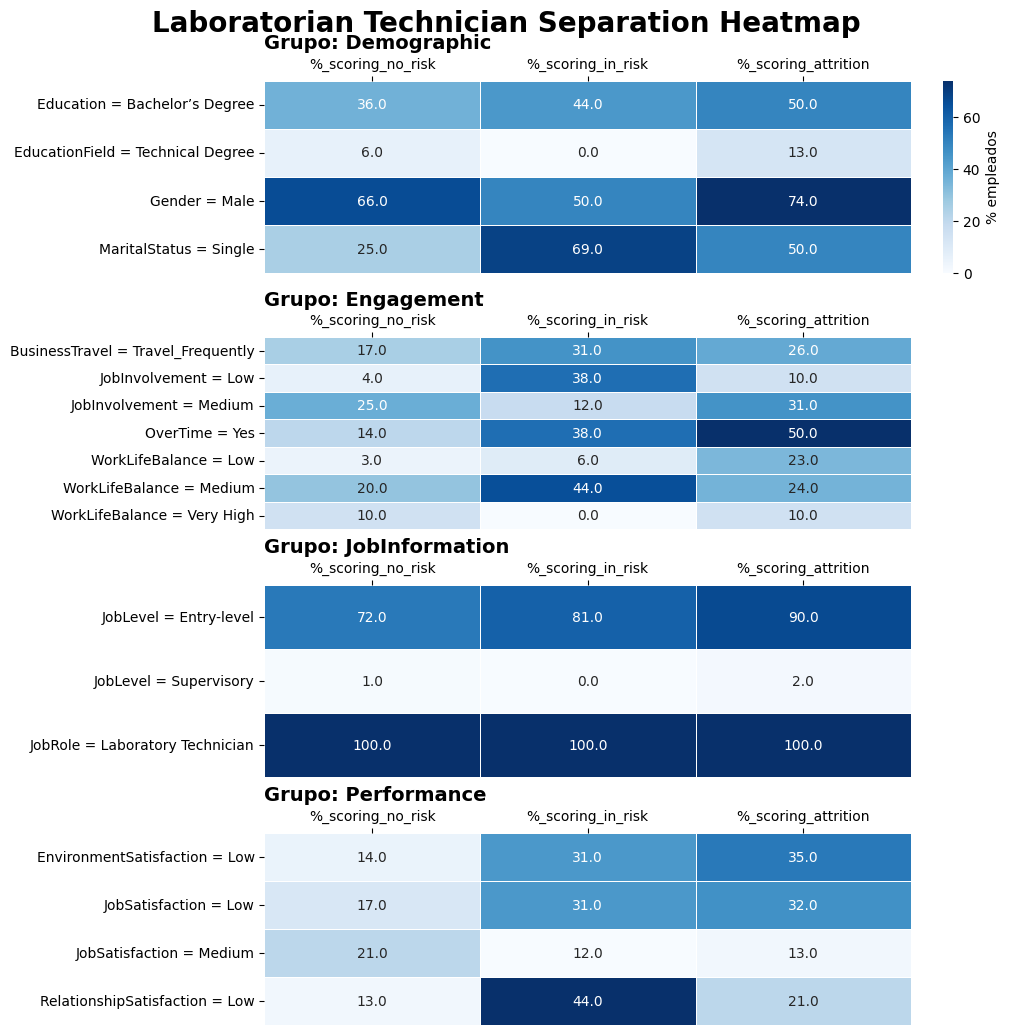

In [89]:
### >>> SEPARATION VARIABLES <<<

# In Risk
Laboratory_Technician_In_Risk_Sep = in_risk[in_risk['JobRole']=='Laboratory Technician']
Laboratory_Technician_In_Risk_Sep = crear_minicubo(Laboratory_Technician_In_Risk_Sep,dim_separation,metricas)
perfil_ajustado(Laboratory_Technician_In_Risk_Sep, separation_vars_grouped)

#No_Risk
Laboratory_Technician_No_Risk_Sep = no_risk[no_risk['JobRole']=='Laboratory Technician']
Laboratory_Technician_No_Risk_Sep = crear_minicubo(Laboratory_Technician_No_Risk_Sep,dim_separation,metricas)
perfil_ajustado(Laboratory_Technician_No_Risk_Sep, separation_vars_grouped)

# Attrition

Laboratory_Technician_Attrition_Sep = df_att[df_att['JobRole']=='Laboratory Technician']
Laboratory_Technician_Attrition_Sep = crear_minicubo(Laboratory_Technician_Attrition_Sep,dim_separation,metricas)
perfil_ajustado(Laboratory_Technician_Attrition_Sep,separation_vars_grouped)
Laboratory_Technician_Comp_Sep = combinar_perfiles(Laboratory_Technician_In_Risk_Sep,
                                             Laboratory_Technician_No_Risk_Sep,
                                             Laboratory_Technician_Attrition_Sep,
                                             separation_vars_grouped)

Laboratory_Technician_Comp_Sep ['Grupo'] = Laboratory_Technician_Comp_Sep ['variable'].map(variable_to_group)
Laboratory_Technician_Comp_Sep = Laboratory_Technician_Comp_Sep .sort_values(by=['Grupo', 'variable'])
Laboratory_Technician_Comp_Sep [['Grupo','variable','value','%_scoring_in_risk','%_scoring_no_risk','%_scoring_attrition']]
heatmap_Jobrole(Laboratory_Technician_Comp_Sep, "Laboratorian Technician Separation Heatmap" )

<U>***El perfil general de Abandono de trabajo es:***</U>

**1 Demografica**
- Un varon, soltero, con una licenciatura.
    
**2 Compromiso**

Manifiesta:
- Una implicacion en el trabajo BAJA.
- Un equilibrio de vida BAJO.
- Viaja frecuentemente.

**3 Informacion del puesto laboral:**
- El puesto de trabajo es señalado como critico.
- El abandono es transversal a todos los niveles Entry-Level, Supervisory.

**4 Desempeño:**
- La satisfaccion laboral es BAJA.
- La satisfaccion con el clima laboral es BAJA.
- La satisfaccion con las relaciones interpersonales es BAJA.

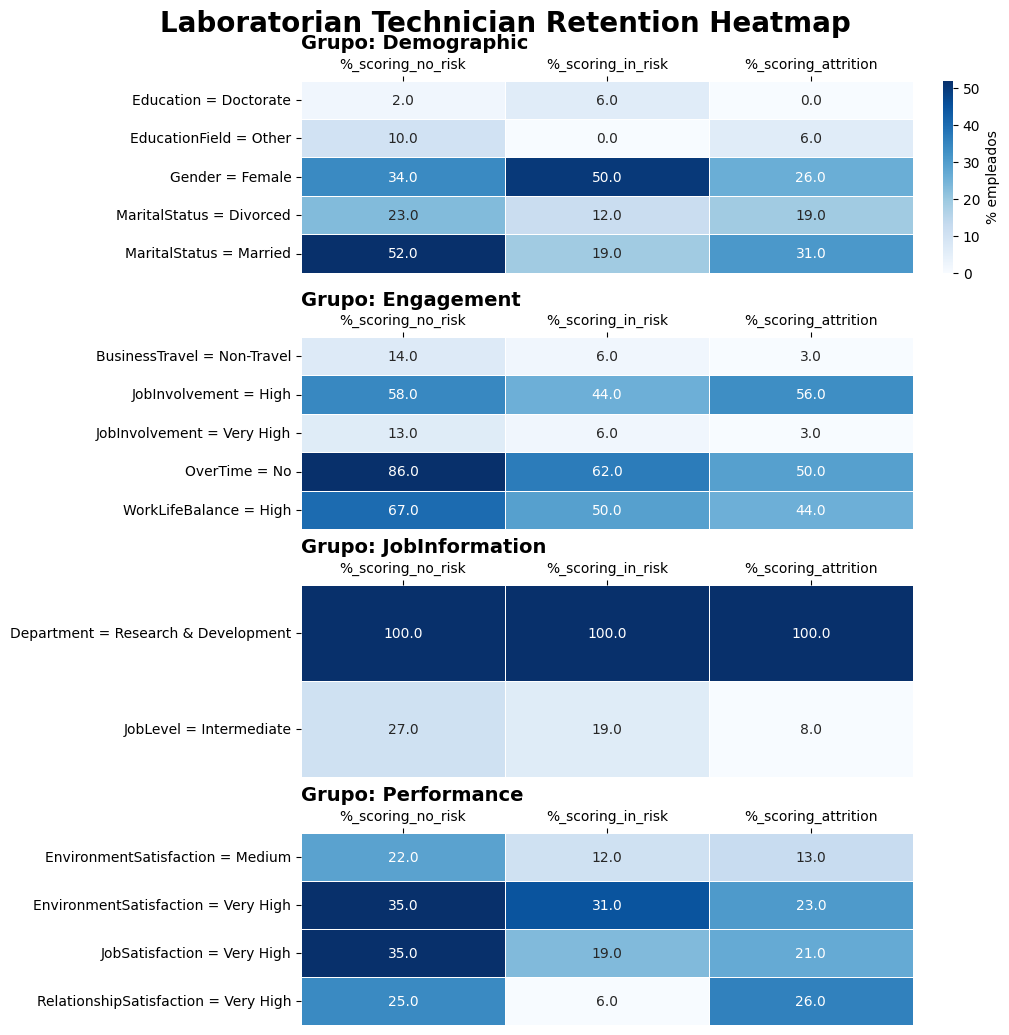

In [90]:
### >>> RETENTION VARIABLES <<<

# In Risk
Laboratory_Technician_In_Risk_Ret = in_risk[in_risk['JobRole']=='Laboratory Technician']
Laboratory_Technician_In_Risk_Ret = crear_minicubo(Laboratory_Technician_In_Risk_Ret,dim_retention,metricas)
perfil_ajustado(Laboratory_Technician_In_Risk_Ret, retention_vars_grouped)

#No_Risk
Laboratory_Technician_No_Risk_Ret = no_risk[no_risk['JobRole']=='Laboratory Technician']
Laboratory_Technician_No_Risk_Ret = crear_minicubo(Laboratory_Technician_No_Risk_Ret,dim_retention,metricas)
perfil_ajustado(Laboratory_Technician_No_Risk_Ret, retention_vars_grouped)

# Attrition

Laboratory_Technician_Attrition_Ret = df_att[df_att['JobRole']=='Laboratory Technician']
Laboratory_Technician_Attrition_Ret = crear_minicubo(Laboratory_Technician_Attrition_Ret,dim_retention,metricas)
perfil_ajustado(Laboratory_Technician_Attrition_Ret,retention_vars_grouped)
Laboratory_Technician_Comp_Ret = combinar_perfiles(Laboratory_Technician_In_Risk_Ret,
                                             Laboratory_Technician_No_Risk_Ret,
                                             Laboratory_Technician_Attrition_Ret,
                                             retention_vars_grouped)

Laboratory_Technician_Comp_Ret['Grupo'] = Laboratory_Technician_Comp_Ret['variable'].map(variable_to_group)
Laboratory_Technician_Comp_Ret = Laboratory_Technician_Comp_Ret.sort_values(by=['Grupo', 'variable'])
Laboratory_Technician_Comp_Ret[['Grupo','variable','value','%_scoring_in_risk','%_scoring_no_risk','%_scoring_attrition']]
heatmap_Jobrole(Laboratory_Technician_Comp_Ret, "Laboratorian Technician Retention Heatmap" )

In [91]:
filtered = df_att[(df_att['JobRole'] == 'Laboratory Technician')]

mode_by_jobrole(filtered, column_groups_final)

,Grupo,Variable,Moda
0,Demographic,Age,28.0
1,Demographic,Gender,Male
2,Demographic,MaritalStatus,Single
3,Demographic,Education,Bachelor’s Degree
4,Demographic,EducationField,Life Sciences
5,JobInformation,Department,Research & Development
6,JobInformation,JobLevel,Entry-level
7,JobInformation,JobRole,Laboratory Technician
8,JobInformation,DistanceFromHome,2.0
9,JobInformation,NumCompaniesWorked,1.0


**<U>Laboratory Technician Analisis Modas.</U>**

1.- Demografico

Varon joven soltero,  con un licenciatura en Life Science

2.- Puesto Trabajo.

Junior en puesto entrada, con un alto desempeño en el trabajo.

3.- Performance.

Satisfaccion con el entorno laboral baja y satisfaccion con el trabajo es media

Las satisfaccion con las relaciones interpersonales es alta y su desempeño satisfactorio

4.- Compromiso

Balance vida-trabajo y desempeño en el trabajo alto.

NO Hace horas extras.

Viaja ocasionalment

### 6.2.2 Research Scientist

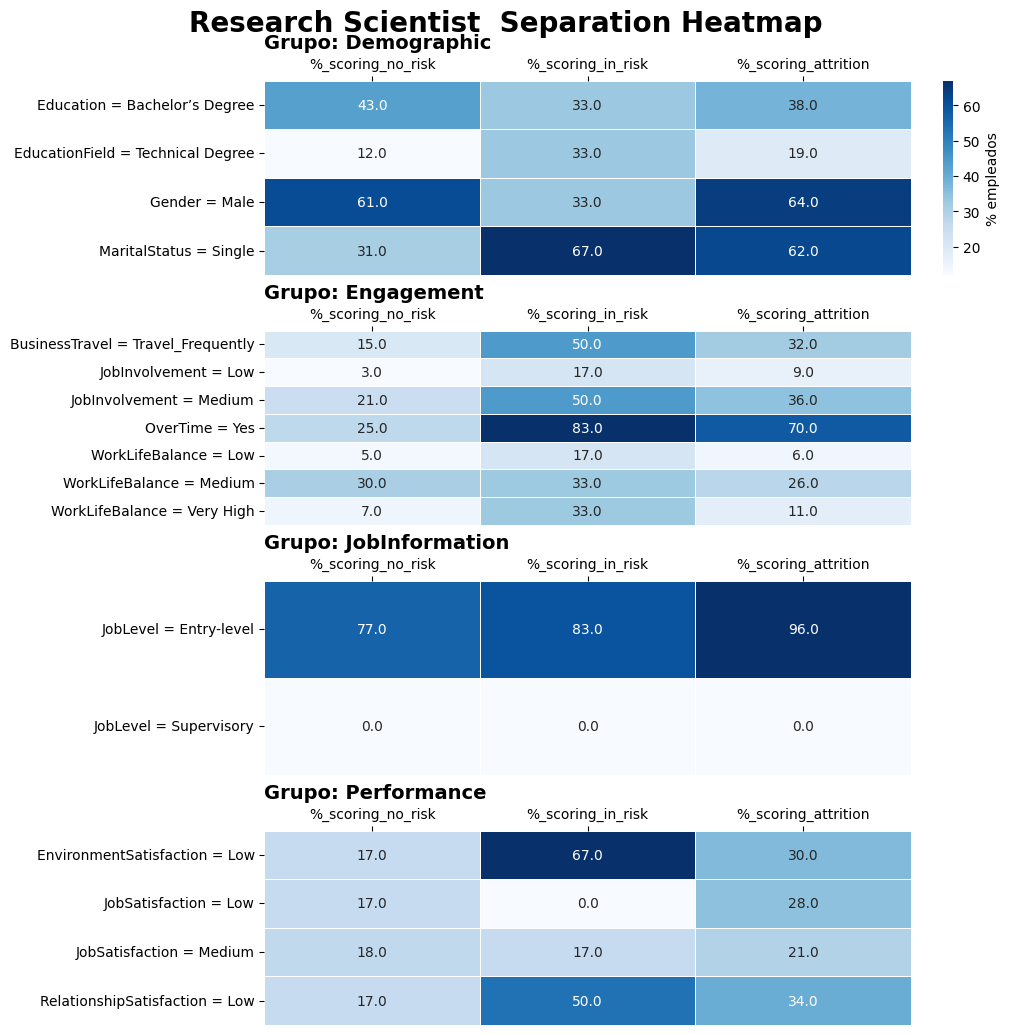

In [92]:
### >>> SEPARATION VARIABLES <<<

# In Risk
Research_Scientist_In_Risk_Sep = in_risk[in_risk['JobRole']=='Research Scientist']
Research_Scientist_In_Risk_Sep = crear_minicubo(Research_Scientist_In_Risk_Sep,dim_separation,metricas)
perfil_ajustado(Research_Scientist_In_Risk_Sep, separation_vars_grouped)

#No_Risk
Research_Scientist_No_Risk_Sep = no_risk[no_risk['JobRole']=='Research Scientist']
Research_Scientist_No_Risk_Sep = crear_minicubo(Research_Scientist_No_Risk_Sep,dim_separation,metricas)
perfil_ajustado(Research_Scientist_No_Risk_Sep, separation_vars_grouped)

# Attrition

Research_Scientist_Attrition_Sep = df_att[df_att['JobRole']=='Research Scientist']
Research_Scientist_Attrition_Sep = crear_minicubo(Research_Scientist_Attrition_Sep,dim_separation,metricas)
perfil_ajustado(Research_Scientist_Attrition_Sep,separation_vars_grouped)
Research_Scientist_Comp_Sep = combinar_perfiles(Research_Scientist_In_Risk_Sep,
                                             Research_Scientist_No_Risk_Sep,
                                             Research_Scientist_Attrition_Sep,
                                             separation_vars_grouped)

Research_Scientist_Comp_Sep ['Grupo'] = Research_Scientist_Comp_Sep ['variable'].map(variable_to_group)
Research_Scientist_Comp_Sep = Research_Scientist_Comp_Sep .sort_values(by=['Grupo', 'variable'])
Research_Scientist_Comp_Sep [['Grupo','variable','value','%_scoring_in_risk','%_scoring_no_risk','%_scoring_attrition']]
heatmap_Jobrole(Research_Scientist_Comp_Sep, "Research Scientist  Separation Heatmap" )

<U>***El perfil general de Abandono de trabajo Resarch Scientist es:***</U>

**1 Demografica**
- Un persona, soltero, con una licenciatura o grado tecnica

**2 Compromiso**

Manifiesta:
- Una implicacion en el trabajo MEDIA o BAJA.
- Un equilibrio de vida BAJO o MEDIO.
- Realiza horas extras.
- Viaja frecuentemente.

**3 Informacion del puesto laboral:**
- El abandono es en el nivel Entry-Level

**4 Desempeño:**
- La satisfaccion con el clima laboral es BAJA.
- La satisfaccion con las relaciones interpersonales es BAJA.

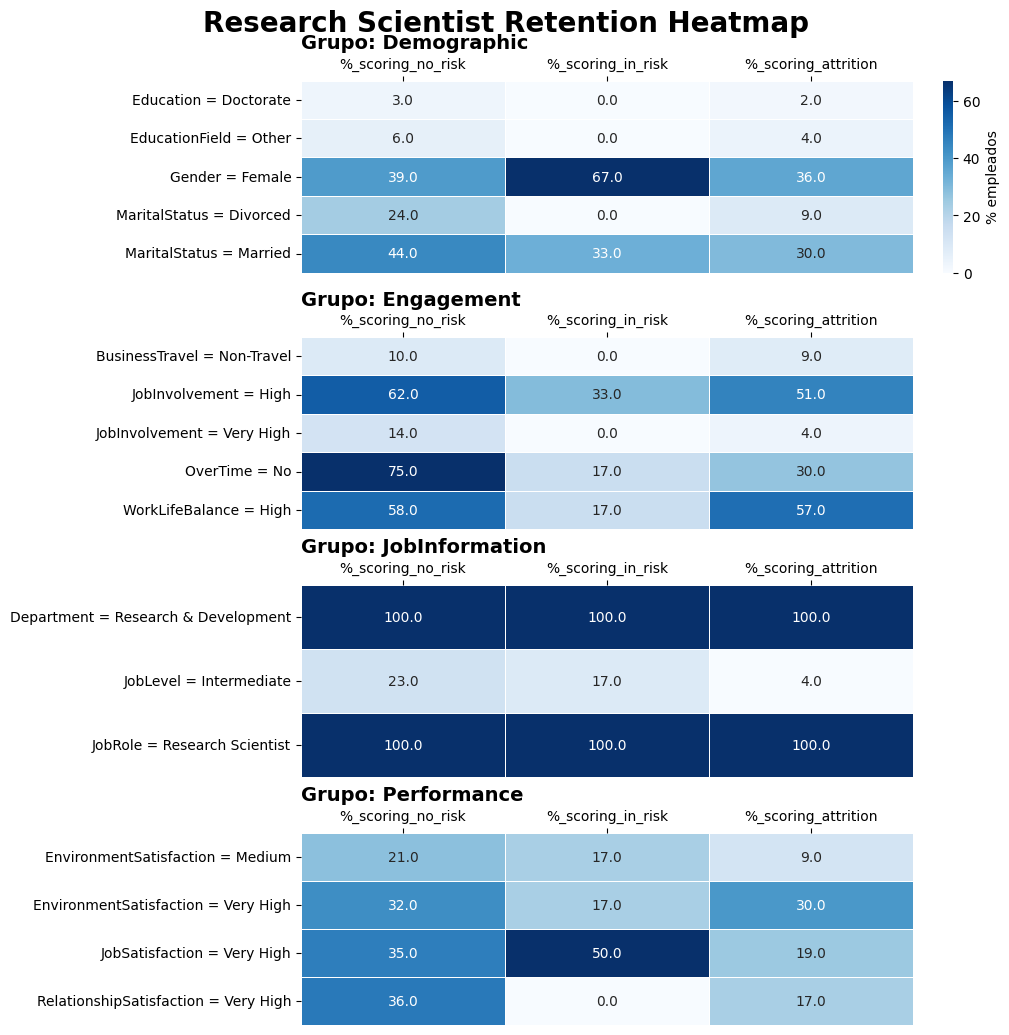

In [93]:
### >>> RETENTION VARIABLES <<<

# In Risk
Research_Scientist_In_Risk_Ret = in_risk[in_risk['JobRole']=='Research Scientist']
Research_Scientist_In_Risk_Ret = crear_minicubo(Research_Scientist_In_Risk_Ret,dim_retention,metricas)
perfil_ajustado(Research_Scientist_In_Risk_Ret, retention_vars_grouped)

#No_Risk
Research_Scientist_No_Risk_Ret = no_risk[no_risk['JobRole']=='Research Scientist']
Research_Scientist_No_Risk_Ret = crear_minicubo(Research_Scientist_No_Risk_Ret,dim_retention,metricas)
perfil_ajustado(Research_Scientist_No_Risk_Ret, retention_vars_grouped)

# Attrition

Research_Scientist_Attrition_Ret = df_att[df_att['JobRole']=='Research Scientist']
Research_Scientist_Attrition_Ret = crear_minicubo(Research_Scientist_Attrition_Ret,dim_retention,metricas)
perfil_ajustado(Research_Scientist_Attrition_Ret,retention_vars_grouped)
Research_Scientist_Comp_Ret = combinar_perfiles(Research_Scientist_In_Risk_Ret,
                                             Research_Scientist_No_Risk_Ret,
                                             Research_Scientist_Attrition_Ret,
                                             retention_vars_grouped)

Research_Scientist_Comp_Ret['Grupo'] = Research_Scientist_Comp_Ret['variable'].map(variable_to_group)
Research_Scientist_Comp_Ret = Research_Scientist_Comp_Ret.sort_values(by=['Grupo', 'variable'])
Research_Scientist_Comp_Ret[['Grupo','variable','value','%_scoring_in_risk','%_scoring_no_risk','%_scoring_attrition']]
heatmap_Jobrole(Research_Scientist_Comp_Ret, "Research Scientist Retention Heatmap" )

In [94]:
filtered = df_att[(df_att['JobRole'] == 'Research Scientist')]

mode_by_jobrole(filtered, column_groups_final)

,Grupo,Variable,Moda
0,Demographic,Age,29.0
1,Demographic,Gender,Male
2,Demographic,MaritalStatus,Single
3,Demographic,Education,Bachelor’s Degree
4,Demographic,EducationField,Life Sciences
5,JobInformation,Department,Research & Development
6,JobInformation,JobLevel,Entry-level
7,JobInformation,JobRole,Research Scientist
8,JobInformation,DistanceFromHome,1.0
9,JobInformation,NumCompaniesWorked,1.0


**<U>Research Scientist Analisis Modas.</U>**

1.- Demografico

Varon joven soltero,  con una  licenciatura en Life Science.

2.- Puesto Trabajo.

Junior , en entrey-level, con un alto desempeño en el trabajo.

3.- Performance.

Satisfaccion con el entorno laboral y satisfaccion con el trabajo son altas.
Las satisfaccion con las relaciones interpersonales es baja y su desempeño bajo.

4.- Compromiso.

Balance vida-trabajo y desempeño en el trabajo altos.
Hace horas extras.
Viaja ocasionalmente.


### 6.2.3 Manufacturing Director

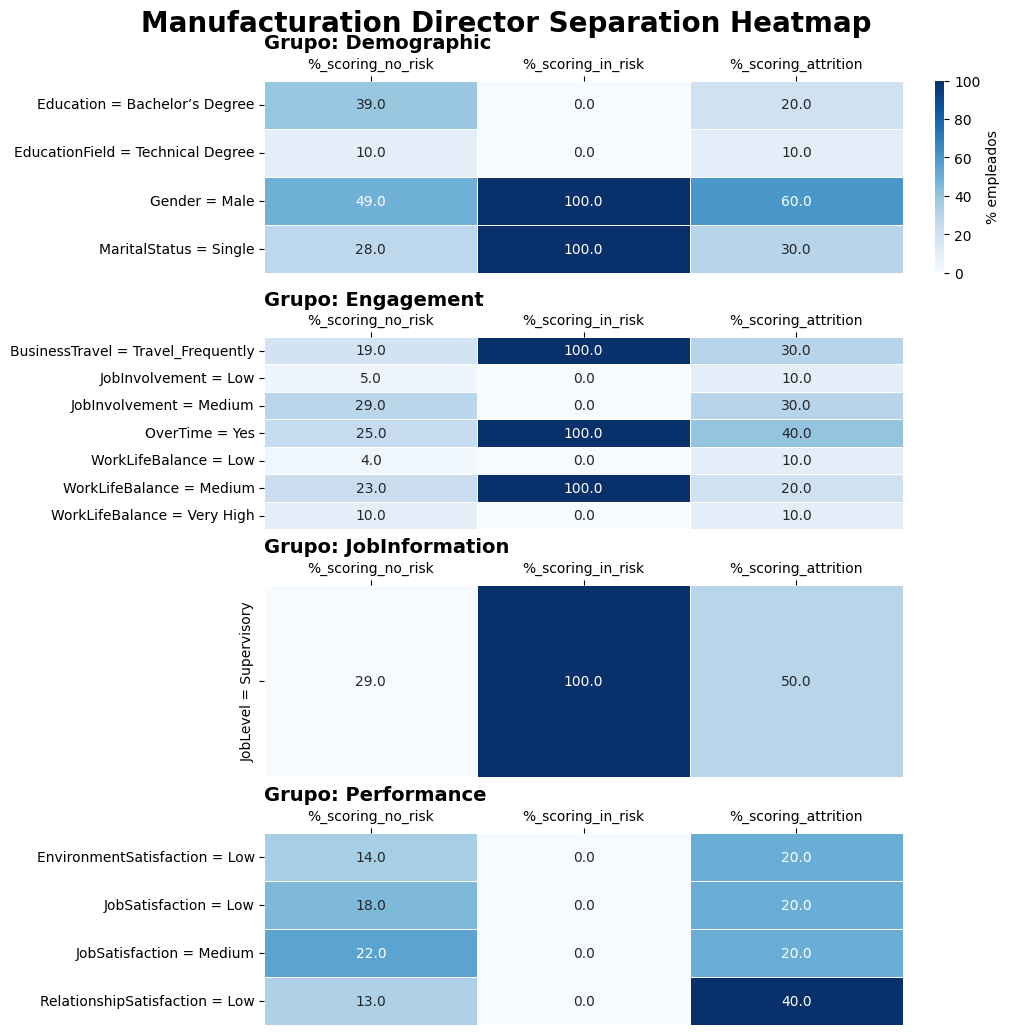

In [95]:
### >>> SEPARATION VARIABLES <<<

# In Risk
Manufacturing_Director_In_Risk_Sep = in_risk[in_risk['JobRole']=='Manufacturing Director']
Manufacturing_Director_In_Risk_Sep = crear_minicubo(Manufacturing_Director_In_Risk_Sep,dim_separation,metricas)
perfil_ajustado(Manufacturing_Director_In_Risk_Sep, separation_vars_grouped)

#No_Risk
Manufacturing_Director_No_Risk_Sep = no_risk[no_risk['JobRole']=='Manufacturing Director']
Manufacturing_Director_No_Risk_Sep = crear_minicubo(Manufacturing_Director_No_Risk_Sep,dim_separation,metricas)
perfil_ajustado(Manufacturing_Director_No_Risk_Sep, separation_vars_grouped)

# Attrition

Manufacturing_Director_Attrition_Sep = df_att[df_att['JobRole']=='Manufacturing Director']
Manufacturing_Director_Attrition_Sep = crear_minicubo(Manufacturing_Director_Attrition_Sep,dim_separation,metricas)
perfil_ajustado(Manufacturing_Director_Attrition_Sep,separation_vars_grouped)
Manufacturing_Director_Comp_Sep = combinar_perfiles(Manufacturing_Director_In_Risk_Sep,
                                             Manufacturing_Director_No_Risk_Sep,
                                             Manufacturing_Director_Attrition_Sep,
                                             separation_vars_grouped)

Manufacturing_Director_Comp_Sep ['Grupo'] = Manufacturing_Director_Comp_Sep ['variable'].map(variable_to_group)
Manufacturing_Director_Comp_Sep = Manufacturing_Director_Comp_Sep .sort_values(by=['Grupo', 'variable'])
Manufacturing_Director_Comp_Sep [['Grupo','variable','value','%_scoring_in_risk','%_scoring_no_risk','%_scoring_attrition']]
heatmap_Jobrole(Manufacturing_Director_Comp_Sep, "Manufacturation Director Separation Heatmap" )

<U>***El perfil general de Abandono de trabajo es:***</U>

**1 Demografica**
- Un varon, soltero

**2 Compromiso**

Manifiesta:
- Un equilibrio de vida BAJO.
- Realiza horas extras.
- Viaja frecuentemente.
- Equilibrio vida laboral medio.

**3 Informacion del puesto laboral:**
- El abandono es en nivel Supervisory 

**4 Desempeño:**
- No manifiesta problema este area

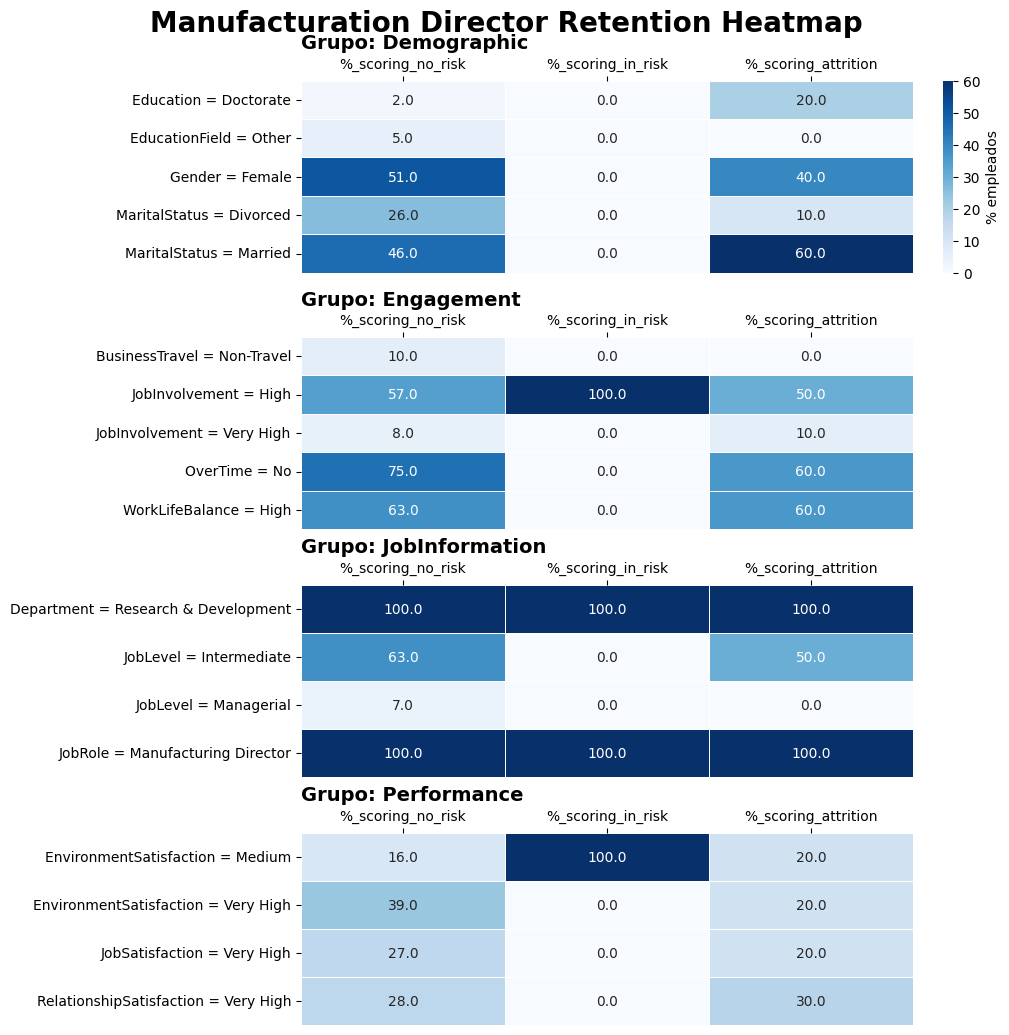

In [96]:
### >>> RETENTION VARIABLES <<<

# In Risk
Manufacturing_Director_In_Risk_Ret = in_risk[in_risk['JobRole']=='Manufacturing Director']
Manufacturing_Director_In_Risk_Ret = crear_minicubo(Manufacturing_Director_In_Risk_Ret,dim_retention,metricas)
perfil_ajustado(Manufacturing_Director_In_Risk_Ret, retention_vars_grouped)

#No_Risk
Manufacturing_Director_No_Risk_Ret = no_risk[no_risk['JobRole']=='Manufacturing Director']
Manufacturing_Director_No_Risk_Ret = crear_minicubo(Manufacturing_Director_No_Risk_Ret,dim_retention,metricas)
perfil_ajustado(Manufacturing_Director_No_Risk_Ret, retention_vars_grouped)

# Attrition

Manufacturing_Director_Attrition_Ret = df_att[df_att['JobRole']=='Manufacturing Director']
Manufacturing_Director_Attrition_Ret = crear_minicubo(Manufacturing_Director_Attrition_Ret,dim_retention,metricas)
perfil_ajustado(Manufacturing_Director_Attrition_Ret,retention_vars_grouped)
Manufacturing_Director_Comp_Ret = combinar_perfiles(Manufacturing_Director_In_Risk_Ret,
                                             Manufacturing_Director_No_Risk_Ret,
                                             Manufacturing_Director_Attrition_Ret,
                                             retention_vars_grouped)

Manufacturing_Director_Comp_Ret['Grupo'] = Manufacturing_Director_Comp_Ret['variable'].map(variable_to_group)
Manufacturing_Director_Comp_Ret = Manufacturing_Director_Comp_Ret.sort_values(by=['Grupo', 'variable'])
Manufacturing_Director_Comp_Ret[['Grupo','variable','value','%_scoring_in_risk','%_scoring_no_risk','%_scoring_attrition']]
heatmap_Jobrole(Manufacturing_Director_Comp_Ret, "Manufacturation Director Retention Heatmap" )

In [97]:
filtered = df_att[(df_att['JobRole'] == 'Manufacturing Director')]

mode_by_jobrole(filtered, column_groups_final)

,Grupo,Variable,Moda
0,Demographic,Age,31.0
1,Demographic,Gender,Male
2,Demographic,MaritalStatus,Married
3,Demographic,Education,Master’s Degree
4,Demographic,EducationField,Medical
5,JobInformation,Department,Research & Development
6,JobInformation,JobLevel,Intermediate
7,JobInformation,JobRole,Manufacturing Director
8,JobInformation,DistanceFromHome,2.0
9,JobInformation,NumCompaniesWorked,1.0


**<U>Manufacturing Director Analisis Modas.</U>**

1.- Demografico

Varon joven casado,  con un master en area medica

2.- Puesto Trabajo.

Senior en puesto intermerdio, con un alto desempeño en el trabajo.

3.- Performance.

Satisfaccion con el entorno laboral y satisfaccion con el trabajo son altas.
Las satisfaccion con las relaciones interpersonales es baja y su desempeño bajo.

4.- Compromiso.

Balance vida-trabajo y desempeño en el trabajo satisfactorio.
No Hace horas extras.
Viaja ocasionalmente.

### 6.2.4 Healthcare Representative

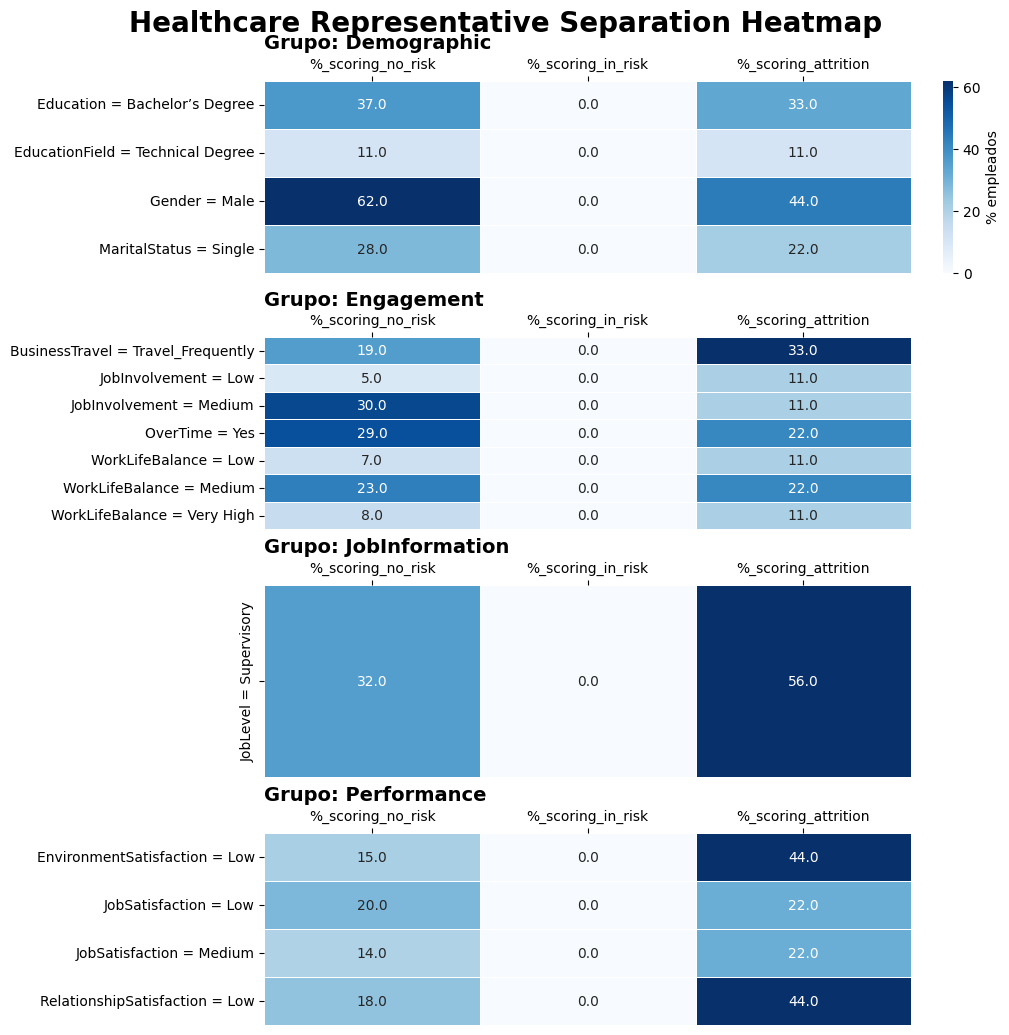

In [98]:

# In Risk
Healthcare_Representative_In_Risk_Sep = in_risk[in_risk['JobRole']=='Healthcare Representative']
Healthcare_Representative_In_Risk_Sep = crear_minicubo(Healthcare_Representative_In_Risk_Sep,dim_separation,metricas)
perfil_ajustado(Healthcare_Representative_In_Risk_Sep, separation_vars_grouped)

#No_Risk
Healthcare_Representative_No_Risk_Sep = no_risk[no_risk['JobRole']=='Healthcare Representative']
Healthcare_Representative_No_Risk_Sep = crear_minicubo(Healthcare_Representative_No_Risk_Sep,dim_separation,metricas)
perfil_ajustado(Healthcare_Representative_No_Risk_Sep, separation_vars_grouped)

# Attrition

Healthcare_Representative_Attrition_Sep = df_att[df_att['JobRole']=='Healthcare Representative']
Healthcare_Representative_Attrition_Sep = crear_minicubo(Healthcare_Representative_Attrition_Sep,dim_separation,metricas)
perfil_ajustado(Healthcare_Representative_Attrition_Sep,separation_vars_grouped)
Healthcare_Representative_Comp_Sep = combinar_perfiles(Healthcare_Representative_In_Risk_Sep,
                                             Healthcare_Representative_No_Risk_Sep,
                                             Healthcare_Representative_Attrition_Sep,
                                             separation_vars_grouped)

Healthcare_Representative_Comp_Sep ['Grupo'] = Healthcare_Representative_Comp_Sep ['variable'].map(variable_to_group)
Healthcare_Representative_Comp_Sep = Healthcare_Representative_Comp_Sep .sort_values(by=['Grupo', 'variable'])
Healthcare_Representative_Comp_Sep [['Grupo','variable','value','%_scoring_in_risk','%_scoring_no_risk','%_scoring_attrition']]
heatmap_Jobrole(Healthcare_Representative_Comp_Sep, "Healthcare Representative Separation Heatmap" )

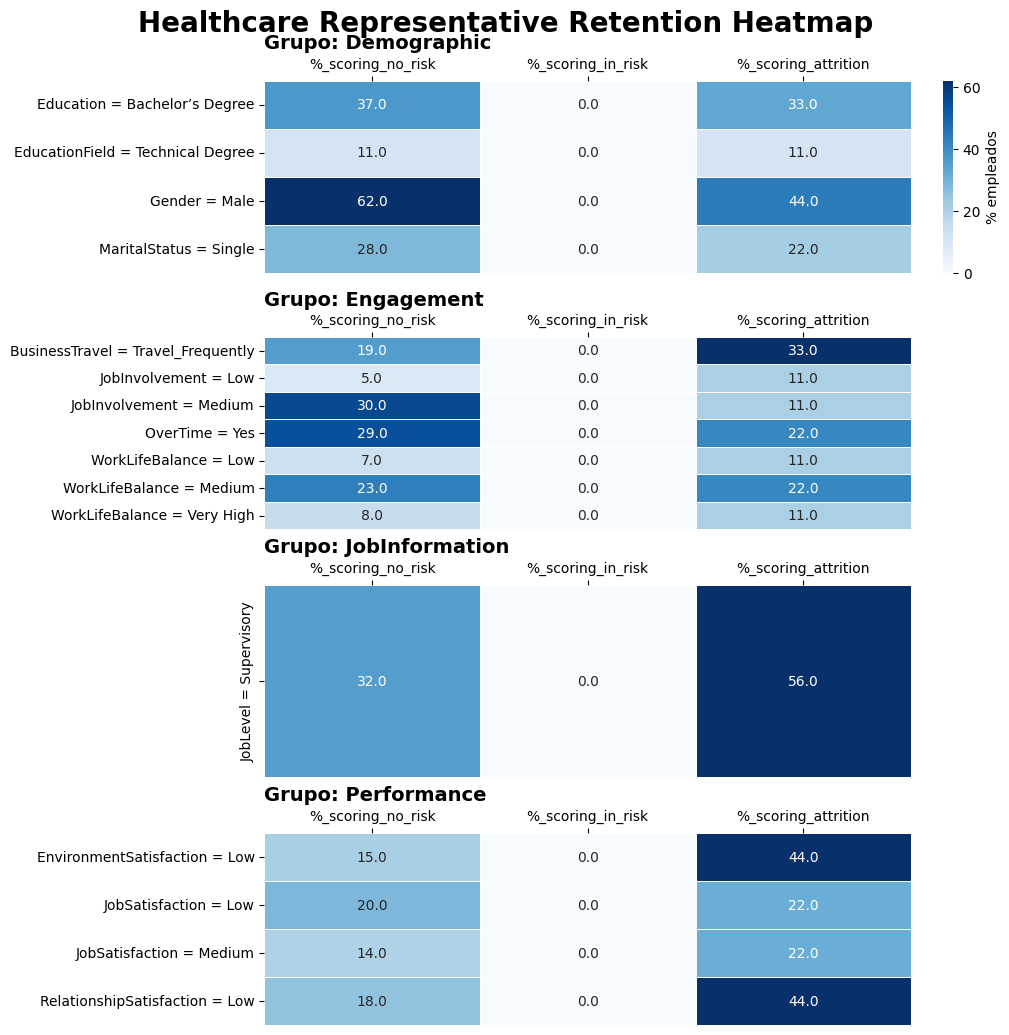

In [99]:
### >>> RETENTION VARIABLES <<<

# In Risk
Healthcare_Representative_In_Risk_Ret = in_risk[in_risk['JobRole']=='Healthcare Representative']
Healthcare_Representative_In_Risk_Ret = crear_minicubo(Healthcare_Representative_In_Risk_Ret,dim_separation,metricas)
perfil_ajustado(Healthcare_Representative_In_Risk_Ret, separation_vars_grouped)

#No_Risk
Healthcare_Representative_No_Risk_Ret = no_risk[no_risk['JobRole']=='Healthcare Representative']
Healthcare_Representative_No_Risk_Ret = crear_minicubo(Healthcare_Representative_No_Risk_Ret,dim_separation,metricas)
perfil_ajustado(Healthcare_Representative_No_Risk_Ret, separation_vars_grouped)

# Attrition

Healthcare_Representative_Attrition_Ret = df_att[df_att['JobRole']=='Healthcare Representative']
Healthcare_Representative_Attrition_Ret = crear_minicubo(Healthcare_Representative_Attrition_Ret,dim_separation,metricas)
perfil_ajustado(Healthcare_Representative_Attrition_Ret,separation_vars_grouped)
Healthcare_Representative_Comp_Ret = combinar_perfiles(Healthcare_Representative_In_Risk_Ret,
                                             Healthcare_Representative_No_Risk_Ret,
                                             Healthcare_Representative_Attrition_Ret,
                                             separation_vars_grouped)

Healthcare_Representative_Comp_Ret ['Grupo'] = Healthcare_Representative_Comp_Ret ['variable'].map(variable_to_group)
Healthcare_Representative_Comp_Ret = Healthcare_Representative_Comp_Ret .sort_values(by=['Grupo', 'variable'])
Healthcare_Representative_Comp_Ret [['Grupo','variable','value','%_scoring_in_risk','%_scoring_no_risk','%_scoring_attrition']]
heatmap_Jobrole(Healthcare_Representative_Comp_Ret, "Healthcare Representative Retention Heatmap" )

In [100]:
filtered = df_att[(df_att['JobRole'] == 'Healthcare Representative')]

mode_by_jobrole(filtered, column_groups_final)

,Grupo,Variable,Moda
0,Demographic,Age,28
1,Demographic,Gender,Female
2,Demographic,MaritalStatus,Married
3,Demographic,Education,Associate Degree
4,Demographic,EducationField,Medical
5,JobInformation,Department,Research & Development
6,JobInformation,JobLevel,Supervisory
7,JobInformation,JobRole,Healthcare Representative
8,JobInformation,DistanceFromHome,2
9,JobInformation,NumCompaniesWorked,1.0


In [101]:
in_risk.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'annual_salary',
       'economic_impact', 'JobRoleLevel', 'scoring_attrition'],
      dtype='object')

In [102]:
in_risk['JobRole'].value_counts()

JobRole
Laboratory Technician     16
Sales Representative       9
Sales Executive            6
Research Scientist         6
Human Resources            1
Manufacturing Director     1
Name: count, dtype: int64